## Preprocesamiento

Se visualizarán las matrices ya normalizadas: 

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import math
import pyabf
import pandas as pd
from scipy.signal import resample
import numpy as np

### Graficar señales

In [3]:
def load_data_matrix(file_path):
    """
    Carga una matriz de datos desde un archivo CSV y extrae la etiqueta del nombre completo del archivo.

    Parameters:
    - file_path (str): La ruta al archivo CSV.

    Returns:
    - tuple:
        - np.ndarray: Matriz de datos cargada.
        - str: La etiqueta extraída del nombre completo del archivo.
    """
    # Cargar datos desde el archivo CSV
    df = pd.read_csv(file_path)

    # Extraer la etiqueta del nombre completo del archivo, sin la extensión .csv
    label = os.path.basename(file_path).split('_')[0]

    return df.values, label


Se verá una primera matriz, se explorarán los datos de forma visual. 

In [4]:
file_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix\CA1_18306013.csv'
df, label = load_data_matrix(file_path)

In [5]:
def plot_data_matrix(data_matrix, title="Data Matrix"):
    """
    Grafica una matriz de datos donde cada columna es un segmento de la función,
    mostrando hasta 5 segmentos por gráfica y permitiendo interactividad con widgets.

    Parameters:
    - data_matrix (np.ndarray): La matriz de datos a graficar.
    - title (str): Título del gráfico.

    Outputs:
    - None
    """
    num_segments = data_matrix.shape[1]
    num_plots = math.ceil(num_segments / 5)  # Calcula el número necesario de gráficos

    def plot_subset(page=0):
        plt.figure(figsize=(15, 8))  # Aumentar el tamaño de la gráfica
        start = page * 5
        end = min(start + 5, num_segments)
        for i in range(start, end):
            plt.plot(data_matrix[:, i], label=f'Segment {i+1}')
        plt.title(f"{title} - Page {page+1}")
        plt.xlabel('Time Points')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Crear un slider interactivo para navegar entre las diferentes páginas de gráficos
    interact(plot_subset, page=IntSlider(min=0, max=num_plots-1, step=1, value=0, description="Page"))

# Configurando el entorno de matplotlib para interactividad
%matplotlib widget

In [6]:
plot_data_matrix(df, title="Data Matrix")

interactive(children=(IntSlider(value=0, description='Page', max=35), Output()), _dom_classes=('widget-interac…

### Eliminar gran cantidad de ceros

Se encontró que al guardar las señales desde matlab se generaban columnas con todos sus valores en 0, dichos segmentos se eliminarán. 

In [7]:
# Cargar el archivo CSV sin encabezado para determinar el número de columnas
df_temp = pd.read_csv('C:/Users/franc/Downloads/saved_matrix/saved_matrix/CA1_17315012.csv', header=None)
num_columns = df_temp.shape[1]  # Obtener el número de columnas desde el DataFrame temporal
column_names = range(num_columns)

# Cargar nuevamente el archivo ahora con nombres de columnas numéricos
df = pd.read_csv('C:/Users/franc/Downloads/saved_matrix/saved_matrix/CA1_17315012.csv', header=None, names=column_names)

In [8]:
df

0         1         2         3         4         5         6    \
0     -0.117846  0.000000  0.232154  0.000000  0.094654  0.000000  0.157154   
1     -0.120346  0.000000  0.227154  0.000000  0.084654  0.000000  0.157154   
2     -0.125346  0.000000  0.244654  0.000000  0.099654  0.000000  0.154654   
3     -0.127846  0.000000  0.259654  0.000000  0.107154  0.000000  0.159654   
4     -0.130346  0.000000  0.249654  0.000000  0.119654  0.000000  0.157154   
...         ...       ...       ...       ...       ...       ...       ...   
98995  0.000000  0.007154  0.000000  0.044654  0.000000  0.049654  0.000000   
98996  0.000000  0.012154  0.000000  0.052154  0.000000  0.049654  0.000000   
98997  0.000000 -0.005346  0.000000  0.054654  0.000000  0.052154  0.000000   
98998  0.000000  0.009654  0.000000  0.057154  0.000000  0.052154  0.000000   
98999  0.000000  0.002154  0.000000  0.064654  0.000000  0.052154  0.000000   

            7         8         9    ...       350       351       352  \
0      0.000000 -0.185346  0.000000  ... -0.032846  0.000000  0.084654   
1      0.000000 -0.182846  0.000000  ... -0.032846  0.000000  0.082154   
2      0.000000 -0.177846  0.000000  ... -0.032846  0.000000  0.087154   
3      0.000000 -0.172846  0.000000  ... -0.027846  0.000000  0.077154   
4      0.000000 -0.177846  0.000000  ... -0.027846  0.000000  0.069654   
...         ...       ...       ...  ...       ...       ...       ...   
98995  0.029654  0.000000 -0.035346  ...  0.000000 -0.155346  0.000000   
98996  0.034654  0.000000 -0.025346  ...  0.000000 -0.162846  0.000000   
98997  0.039654  0.000000 -0.020346  ...  0.000000 -0.160346  0.000000   
98998  0.039654  0.000000 -0.017846  ...  0.000000 -0.160346  0.000000   
98999  0.037154  0.000000 -0.007846  ...  0.000000 -0.162846  0.000000   

            353       354       355       356       357       358  359  
0      0.000000  0.039654  0.000000  0.017154  0.000000 -0.107846  0.0  
1      0.000000  0.042154  0.000000  0.014654  0.000000 -0.105346  0.0  
2      0.000000  0.039654  0.000000  0.014654  0.000000 -0.107846  0.0  
3      0.000000  0.042154  0.000000  0.007154  0.000000 -0.102846  0.0  
4      0.000000  0.029654  0.000000  0.037154  0.000000 -0.100346  0.0  
...         ...       ...       ...       ...       ...       ...  ...  
98995 -0.082846  0.000000 -0.127846  0.000000  0.009654  0.000000  0.0  
98996 -0.085346  0.000000 -0.130346  0.000000 -0.007846  0.000000  0.0  
98997 -0.070346  0.000000 -0.130346  0.000000  0.004654  0.000000  0.0  
98998 -0.080346  0.000000 -0.127846  0.000000 -0.002846  0.000000  0.0  
98999 -0.072846  0.000000 -0.135346  0.000000 -0.005346  0.000000  0.0  

[99000 rows x 360 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Columns: 360 entries, 0 to 359
dtypes: float64(360)
memory usage: 271.9 MB


In [10]:
threshold=0.95

# Calcular el porcentaje de ceros en cada columna
zero_percentage = (df == 0).mean()

# Filtrar columnas donde el porcentaje de ceros sea menor o igual al umbral
filtered_columns = zero_percentage[zero_percentage <= threshold].index

In [11]:
filtered_columns

Index([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,
       ...
       341, 343, 345, 347, 349, 351, 353, 355, 357, 359],
      dtype='int64', length=180)

In [12]:
# Convertir todas las columnas a flotante para asegurar la comparación numérica
df = df.apply(pd.to_numeric, errors='ignore')

# Eliminar columnas que contienen solo ceros
df = df.loc[:, (df != 0).any(axis=0)]

C:\Users\franc\AppData\Local\Temp\ipykernel_5224\2034713913.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [13]:
def clean_excel_files(input_folder_path, output_folder_path):
    """
    Esta función procesa todos los archivos de Excel en un directorio de entrada, eliminando cualquier columna
    que contenga más del 95% de valores cero, y guarda los archivos modificados en un directorio de salida.

    Parámetros:
        input_folder_path (str): La ruta al directorio que contiene los archivos de Excel.
        output_folder_path (str): La ruta al directorio donde se deben guardar los archivos modificados.
    """
    # Asegurarse de que el directorio de salida existe, si no, crearlo
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Recorrer todos los archivos en el directorio de entrada
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".csv"):  # Verificamos si el archivo es un CSV
            file_path = os.path.join(input_folder_path, filename)
            
            # Cargar el archivo de Excel
            df = pd.read_csv(file_path)
            
            # Convertir todas las columnas a flotante para asegurar la comparación numérica
            df = df.apply(pd.to_numeric, errors='ignore')
            
            # Calcular el porcentaje de ceros y filtrar columnas
            zero_percentage = (df == 0).mean()
            filtered_columns = zero_percentage[zero_percentage <= 0.95].index
            df = df.loc[:, filtered_columns]
            
            # Guardar el DataFrame modificado en el directorio de salida
            output_file_path = os.path.join(output_folder_path, filename)
            df.to_csv(output_file_path, index=False)

            print(f"Processed and saved: {output_file_path}")

In [54]:
input_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix'
output_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros'
clean_excel_files(input_folder_path, output_folder_path)


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA1_17315012.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA1_17419014.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA1_18306013.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901005.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901006.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901007.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901008.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901009.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901010.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901011.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901012.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901013.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15901014.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15o14006.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CA_15o14031.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CxM1 LPF_11361009.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CxM1 LPF_11361010.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\CxM1 LPF_11361089.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\Thalamus_11361009.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\Thalamus_11361010.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\Thalamus_11361089.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901005.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901006.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901007.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901008.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901009.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901010.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901011.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901012.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901013.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15901014.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15o14006.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_15o14031.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_17620042.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_18913006.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_18913007.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_18913008.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_18920011.csv


C:\Users\franc\AppData\Local\Temp\ipykernel_21004\1516356259.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Processed and saved: C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros\vM1_18920012.csv


### Analizar longitud de los segmentos

Se detectaron ceros al comienzo de diferentes señales, se verificará en qué señales hay dichos ceros, se revisarán las longitudes de todas las matrices y se confirmará si es posible eliminar dichos valores. 

In [14]:
input_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_without_zeros'
csv_folder_path = r'C:\Users\franc\Downloads\saved_matrix'

In [15]:
def analyze_csv_matrices(input_folder_path):
    """
    Analiza todos los archivos CSV en un directorio dado, recogiendo información sobre cada uno,
    incluyendo el nombre del archivo, las dimensiones de la matriz.

    Parámetros:
        input_folder_path (str): La ruta al directorio que contiene los archivos CSV.

    Retorna:
        DataFrame: Un DataFrame que contiene el nombre de la matriz, dimensiones.
    """
    # Lista para almacenar los resultados de cada archivo
    results = []

    # Recorrer todos los archivos en el directorio de entrada
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".csv"):  # Verificar si el archivo es un CSV
            file_path = os.path.join(input_folder_path, filename)
            
            # Cargar la matriz desde el archivo CSV
            matrix = pd.read_csv(file_path, header=None)
            
            # Obtener dimensiones de la matriz
            rows, cols = matrix.shape
            
            results.append({
                'Matrix Name': filename,
                'Dimensions': f'{rows}x{cols}'
            })

    # Convertir la lista de resultados en un DataFrame
    result_df = pd.DataFrame(results)

    return result_df

df_result = analyze_csv_matrices(input_folder_path)
df_result

C:\Users\franc\AppData\Local\Temp\ipykernel_5224\1494204964.py:21: DtypeWarning: Columns (14,21,23,26,28,29,36,39,42,43,45,46,49,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv(file_path, header=None)
C:\Users\franc\AppData\Local\Temp\ipykernel_5224\1494204964.py:21: DtypeWarning: Columns (8,25,31,37,42,44,46,48,50,52,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv(file_path, header=None)
C:\Users\franc\AppData\Local\Temp\ipykernel_5224\1494204964.py:21: DtypeWarning: Columns (9,12,20,32,35,39,46,49,52,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv(file_path, header=None)
C:\Users\franc\AppData\Local\Temp\ipykernel_5224\1494204964.py:21: DtypeWarning: Columns (12,17,25,29,35,36,38,39,48,49,51,53,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  matrix = pd.read_csv(file_path, header=N

Matrix Name Dimensions
0        CA1_17315012.csv  99000x180
1        CA1_17419014.csv  99000x180
2        CA1_18306013.csv   98990x90
3         CA_15901005.csv  104687x60
4         CA_15901006.csv  104671x59
5         CA_15901007.csv  104708x60
6         CA_15901008.csv  104708x60
7         CA_15901009.csv  104708x60
8         CA_15901010.csv  104699x60
9         CA_15901011.csv  103999x60
10        CA_15901012.csv  104499x60
11        CA_15901013.csv  103666x60
12        CA_15901014.csv  103666x60
13        CA_15o14006.csv  103858x60
14        CA_15o14031.csv  105198x60
15  CxM1 LPF_11361009.csv   59794x60
16  CxM1 LPF_11361010.csv   59794x60
17  CxM1 LPF_11361089.csv   59794x60
18  Thalamus_11361009.csv   59794x60
19  Thalamus_11361010.csv   59794x60
20  Thalamus_11361089.csv   59794x60
21       vM1_15901005.csv  105193x60
22       vM1_15901006.csv  105193x59
23       vM1_15901007.csv  105198x60
24       vM1_15901008.csv  105198x60
25       vM1_15901009.csv  105198x60
26       vM1_15901010.csv  105199x60
27       vM1_15901011.csv  104789x60
28       vM1_15901012.csv  104789x60
29       vM1_15901013.csv  103965x60
30       vM1_15901014.csv  103965x60
31       vM1_15o14006.csv  103738x60
32       vM1_15o14031.csv  105198x60
33       vM1_17620042.csv  125832x60
34       vM1_18913006.csv   60800x64
35       vM1_18913007.csv   60801x63
36       vM1_18913008.csv   60800x64
37       vM1_18920011.csv   60800x63
38       vM1_18920012.csv   60800x63

### Extraer tasa de muestreo, metadatos

Se leerán los metadatos 

In [16]:
def extract_metadata(abf):
    """
    Extracts metadata from a loaded ABF object.

    :param abf: Loaded ABF object.
    :return: Dictionary with ABF object metadata.
    """
    metadata = {
        "file_name": abf.abfID,
        "sampling_rate": abf.dataRate,
        "channel_count": abf.channelCount,
        "episode_count": abf.sweepCount,
        "total_time": abf.sweepCount / abf.dataRate,
        "recording_date": abf.abfDateTimeString,
        "comments": abf.abfFileComment,
        "time_unit": "seconds",
        "channel_units": {},
        "channel_labels": {},
        "data_dimensions": abf.data.shape
    }

    for i in range(abf.channelCount):
        abf.setSweep(0, channel=i)
        metadata["channel_units"][i] = abf.adcUnits
        metadata["channel_labels"][i] = abf.adcNames

    return metadata

In [25]:
def load_and_extract_metadata_from_abfs(folder_path):
    metadata_list = []
    for file in os.listdir(folder_path):
        print(file)
        # if file.endswith(".abf" or ".ABF"):
        file_path = os.path.join(folder_path, file)
        abf = pyabf.ABF(file_path)  # Load the ABF file
        metadata = extract_metadata(abf)
        metadata["file_name"] = file  # Add file name to metadata for clarity
        metadata_list.append(metadata)

    # Convert the list of dictionaries into a DataFrame
    return pd.DataFrame(metadata_list)

folder_path = 'C:/Users/franc/Downloads/data_raw/data_raw'

df_metadata = load_and_extract_metadata_from_abfs(folder_path)

11361009.ABF
11361010.ABF
11361089.ABF
11361091.ABF
15901005.abf
15901006.abf
15901007.abf
15901008.abf
15901009.abf
15901010.abf
15901011.abf
15901012.abf
15901013.abf
15901014.abf
15o14000.abf
15o14006.abf
15o14007.abf
15o14008.abf
15o14024.abf
15o14031.abf
16615005.abf
16615042.abf
16615057.abf
16615060.abf
16615061.abf
16615062.abf
16615063.abf
16615064.abf
16615065.abf
17223000.abf
17308005.abf
17308009.abf
17315012.abf
17419014.abf
17613000.abf
17613006.abf
17613025.abf
17613029.abf
17620000.abf
17620007.abf
17620028.abf
17620042.abf
18306013.abf
18913001.abf
18913002.abf
18913003.abf
18913004.abf
18913005.abf
18913006.abf
18913007.abf
18913008.abf
18920002.abf
18920003.abf
18920004.abf
18920005.abf
18920006.abf
18920007.abf
18920008.abf
18920009.abf
18920010.abf
18920011.abf
18920012.abf
22331012.abf


In [26]:
df_metadata

file_name  sampling_rate  channel_count  episode_count  total_time  \
0   11361009.ABF          19607              3              1    0.000051   
1   11361010.ABF          19607              3              1    0.000051   
2   11361089.ABF          19607              3              1    0.000051   
3   11361091.ABF          19607              3              1    0.000051   
4   15901005.abf          20833              3              1    0.000048   
..           ...            ...            ...            ...         ...   
58  18920009.abf          20000              2              1    0.000050   
59  18920010.abf          20000              2              1    0.000050   
60  18920011.abf          20000              2              1    0.000050   
61  18920012.abf          20000              2              1    0.000050   
62  22331012.abf          20000              4              1    0.000050   

             recording_date  \
0   1130-06-13T12:18:54.000   
1   1130-06-13T12:24:29.000   
2   1130-06-13T18:53:09.000   
3   1130-06-13T19:00:35.000   
4   2015-09-01T14:55:15.766   
..                      ...   
58  2018-09-20T12:45:25.509   
59  2018-09-20T12:49:00.829   
60  2018-09-20T12:52:30.891   
61  2018-09-20T12:56:02.365   
62  2022-03-31T13:58:47.480   

                                             comments time_unit  \
0   ` @  p   `      0          ...   seconds   
1   @    0     `  0    p @        ` P...   seconds   
2   @ @  @      0`  @   ...   seconds   
3    `  0  p ` p  p    `  p   0  @ ...   seconds   
4         vM1CA1002 Cx750um H2.2mm  WPSt 100us 1mA *1   seconds   
..                                                ...       ...   
58     PL2mV1 RECmV1750um STM500um WPStim 0V 100us *1   seconds   
59    PL2mV1 RECmV1750um STM500um WPStim 80V 100us *1   seconds   
60    PL2mV1 RECmV1750um STM500um WPStim 60V 100us *1   seconds   
61    PL2mV1 RECmV1750um STM500um WPStim 50V 100us *1   seconds   
62  AMPvM1x2005 vM1I750um vM1r850um   WPSt 100us 5...   seconds   

                                        channel_units  \
0   {0: ['mV', 'mV', 'V'], 1: ['mV', 'mV', 'V'], 2...   
1   {0: ['mV', 'mV', 'V'], 1: ['mV', 'mV', 'V'], 2...   
2   {0: ['mV', 'mV', 'V'], 1: ['mV', 'mV', 'V'], 2...   
3   {0: ['mV', 'mV', 'V'], 1: ['mV', 'mV', 'V'], 2...   
4   {0: ['mV', 'mV', 'V'], 1: ['mV', 'mV', 'V'], 2...   
..                                                ...   
58                 {0: ['mV', 'mV'], 1: ['mV', 'mV']}   
59                 {0: ['mV', 'mV'], 1: ['mV', 'mV']}   
60                 {0: ['mV', 'mV'], 1: ['mV', 'mV']}   
61                 {0: ['mV', 'mV'], 1: ['mV', 'mV']}   
62  {0: ['mV', 'mV', 'mV', 'mV'], 1: ['mV', 'mV', ...   

                                       channel_labels data_dimensions  
0   {0: ['CxM1 LPF', 'Thalamus', 'IN 7'], 1: ['CxM...    (3, 3529411)  
1   {0: ['CxM1 LPF', 'Thalamus', 'IN 7'], 1: ['CxM...    (3, 3529411)  
2   {0: ['CxM1 LPF', 'Thalamus', 'IN 7'], 1: ['CxM...    (3, 3529411)  
3   {0: ['CxM1 LPF', 'Thalamus', 'IN 7'], 1: ['CxM...    (3, 3529411)  
4   {0: ['vM1', 'CA', 'IN 7'], 1: ['vM1', 'CA', 'I...    (3, 6250000)  
..                                                ...             ...  
58           {0: ['vM1', 'IN 7'], 1: ['vM1', 'IN 7']}    (2, 3800000)  
59           {0: ['vM1', 'IN 7'], 1: ['vM1', 'IN 7']}    (2, 3800000)  
60           {0: ['vM1', 'IN 7'], 1: ['vM1', 'IN 7']}    (2, 3800000)  
61           {0: ['vM1', 'IN 7'], 1: ['vM1', 'IN 7']}    (2, 3800000)  
62  {0: ['vM1r', 'vM1l', 'IN 6', 'IN 7'], 1: ['vM1...   (4, 38000000)  

[63 rows x 11 columns]

### Asignar tasa de muestreo 

In [27]:
df_metadata['normalized_name'] = df_metadata['file_name'].str.extract(r'_(\d+)').squeeze()

In [28]:
import re

def extract_id(filename):
    # Extraer la porción del nombre del archivo que está entre "_" y "."
    base_name = filename.split('.')[0]  # Quita la extensión
    parts = base_name.split('_')
    if len(parts) > 1:
        return parts[-1]  # Devuelve la parte después del último "_"
    return None

def extract_id_metadata(filename):
    # Extraer el identificador del nombre del archivo eliminando la extensión '.abf'
    base_name = filename.split('.')[0]  # Quita la extensión
    return base_name

def merge_dataframes_and_add_sampling_rate(df_metadata, df_result):
    # Aplicar la función de extracción para normalizar nombres
    df_metadata['normalized_name'] = df_metadata['file_name'].apply(extract_id_metadata)
    df_result['normalized_name'] = df_result['Matrix Name'].apply(extract_id)
    # Realizar el merge
    df_merged = pd.merge(df_result, df_metadata[['normalized_name', 'sampling_rate']], on='normalized_name', how='left')

    return df_merged

# Ejemplo de uso, suponiendo que df_metadata y df_result ya están definidos y cargados
df_final = merge_dataframes_and_add_sampling_rate(df_metadata, df_result)
print(df_final)


              Matrix Name Dimensions normalized_name  sampling_rate
0        CA1_17315012.csv  99000x180        17315012          10000
1        CA1_17419014.csv  99000x180        17419014          10000
2        CA1_18306013.csv   98990x90        18306013          10000
3         CA_15901005.csv  104687x60        15901005          20833
4         CA_15901006.csv  104671x59        15901006          20833
5         CA_15901007.csv  104708x60        15901007          20833
6         CA_15901008.csv  104708x60        15901008          20833
7         CA_15901009.csv  104708x60        15901009          20833
8         CA_15901010.csv  104699x60        15901010          20833
9         CA_15901011.csv  103999x60        15901011          20833
10        CA_15901012.csv  104499x60        15901012          20833
11        CA_15901013.csv  103666x60        15901013          20833
12        CA_15901014.csv  103666x60        15901014          20833
13        CA_15o14006.csv  103858x60        15o1

### Re-muestreo

In [29]:
new_sampling_rate_1 = 1000
new_sampling_rate_2 = 10000

In [34]:
def resample_csv(file_path, original_rate, new_rate):
    # Cargar los datos
    data = pd.read_csv(file_path)
    
    # Calcular el nuevo número de puntos
    num_samples = data.shape[0]
    num_new_samples = int(num_samples * new_rate / original_rate)
    
    # Crear un DataFrame vacío para almacenar los datos re-muestreados
    resampled_data = pd.DataFrame(index=range(num_new_samples))
    
    # Re-muestrear cada columna
    for column in data.columns:
        resampled_data[column] = resample(data[column].values, num_new_samples)
    
    # Retornar el DataFrame re-muestreado
    return resampled_data

# Asumiendo que tienes un DataFrame df_final con la ruta de cada archivo, la tasa de muestreo actual, etc.
folder_path = 'C:/Users/franc/Downloads/saved_matrix/saved_matrix_without_zeros/'
out_folder_path = 'C:/Users/franc/Downloads/saved_matrix/saved_matrix_resampling_1000/'
df_final['file_path'] = folder_path + df_final['Matrix Name']
df_final['file_path_out'] = out_folder_path + df_final['Matrix Name']

# Aplicar la función de re-muestreo a cada archivo
for index, row in df_final.iterrows():
    if pd.notna(row['sampling_rate']):  # Solo procesar si la tasa de muestreo está definida
        new_data = resample_csv(row['file_path'], row['sampling_rate'], new_sampling_rate_1)
        # Guardar los nuevos datos re-muestreados (opcional)
        new_data.to_csv(row['file_path_out'].replace('.csv', '_resampled.csv'), index=False)

folder_path = 'C:/Users/franc/Downloads/saved_matrix/saved_matrix_without_zeros/'
out_folder_path = 'C:/Users/franc/Downloads/saved_matrix/saved_matrix_resampling_10000/'
df_final['file_path'] = folder_path + df_final['Matrix Name']
df_final['file_path_out'] = out_folder_path + df_final['Matrix Name']

# Aplicar la función de re-muestreo a cada archivo
for index, row in df_final.iterrows():
    if pd.notna(row['sampling_rate']):  # Solo procesar si la tasa de muestreo está definida
        new_data = resample_csv(row['file_path'], row['sampling_rate'], new_sampling_rate_2)
        # Guardar los nuevos datos re-muestreados (opcional)
        new_data.to_csv(row['file_path_out'].replace('.csv', '_resampled.csv'), index=False)

C:\Users\franc\AppData\Local\Temp\ipykernel_5224\3746588311.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_data[column] = resample(data[column].values, num_new_samples)
C:\Users\franc\AppData\Local\Temp\ipykernel_5224\3746588311.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_data[column] = resample(data[column].values, num_new_samples)
C:\Users\franc\AppData\Local\Temp\ipykernel_5224\3746588311.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

### Encontrar longitud de las nuevas matrices

In [35]:
input_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000'
df_result = analyze_csv_matrices(input_folder_path)

In [36]:
df_result

Matrix Name Dimensions
0        CA1_17315012_resampled.csv   9900x180
1        CA1_17419014_resampled.csv   9900x180
2        CA1_18306013_resampled.csv    9899x90
3         CA_15901005_resampled.csv    5026x60
4         CA_15901006_resampled.csv    5025x59
5         CA_15901007_resampled.csv    5027x60
6         CA_15901008_resampled.csv    5027x60
7         CA_15901009_resampled.csv    5027x60
8         CA_15901010_resampled.csv    5026x60
9         CA_15901011_resampled.csv    4992x60
10        CA_15901012_resampled.csv    5016x60
11        CA_15901013_resampled.csv    4976x60
12        CA_15901014_resampled.csv    4976x60
13        CA_15o14006_resampled.csv    4986x60
14        CA_15o14031_resampled.csv    5050x60
15  CxM1 LPF_11361009_resampled.csv    3050x60
16  CxM1 LPF_11361010_resampled.csv    3050x60
17  CxM1 LPF_11361089_resampled.csv    3050x60
18  Thalamus_11361009_resampled.csv    3050x60
19  Thalamus_11361010_resampled.csv    3050x60
20  Thalamus_11361089_resampled.csv    3050x60
21       vM1_15901005_resampled.csv    5050x60
22       vM1_15901006_resampled.csv    5050x59
23       vM1_15901007_resampled.csv    5050x60
24       vM1_15901008_resampled.csv    5050x60
25       vM1_15901009_resampled.csv    5050x60
26       vM1_15901010_resampled.csv    5050x60
27       vM1_15901011_resampled.csv    5030x60
28       vM1_15901012_resampled.csv    5030x60
29       vM1_15901013_resampled.csv    4991x60
30       vM1_15901014_resampled.csv    4991x60
31       vM1_15o14006_resampled.csv    4980x60
32       vM1_15o14031_resampled.csv    5050x60
33       vM1_17620042_resampled.csv    6040x60
34       vM1_18913006_resampled.csv    3040x64
35       vM1_18913007_resampled.csv    3041x63
36       vM1_18913008_resampled.csv    3040x64
37       vM1_18920011_resampled.csv    3040x63
38       vM1_18920012_resampled.csv    3040x63

### Eliminar ceros al comienzo de los segmentos

In [37]:
def remove_initial_zeros_from_csv_files(folder_path):
    """
    Elimina ceros consecutivos al inicio de cada columna de las matrices almacenadas en archivos CSV dentro de un directorio especificado,
    solo si todos los segmentos (columnas) de una matriz comienzan con al menos un cero consecutivo.
    
    Args:
        folder_path (str): La ruta al directorio que contiene los archivos CSV de las matrices.

    Returns:
        dict: Un diccionario donde cada clave es el nombre del archivo y el valor es el DataFrame correspondiente
              con ceros iniciales eliminados si todos los segmentos comienzan con ceros.
    """
    results = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            matrix = pd.read_csv(file_path)
            
            # Determinar la cantidad mínima de ceros consecutivos al inicio de cada columna
            min_zeros = None
            for col in matrix.columns:
                count = 0
                for value in matrix[col]:
                    if value == 0:
                        count += 1
                    else:
                        break
                if min_zeros is None or count < min_zeros:
                    min_zeros = count
            
            # Verificar si todos los segmentos tienen al menos 'min_zeros' ceros al inicio
            all_have_zeros = all((matrix[col][:min_zeros] == 0).all() for col in matrix.columns)
            
            if all_have_zeros and min_zeros > 0:
                # Eliminar los ceros al inicio en todas las columnas
                matrix = matrix.apply(lambda x: x[min_zeros:].reset_index(drop=True))
            
            results[filename] = matrix
    
    return results


In [38]:
folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000'

# Llamar a la función y obtener los DataFrames procesados
processed_matrices = remove_initial_zeros_from_csv_files(folder_path)

In [41]:
processed_matrices['CA1_17419014_resampled.csv']

0       0.1       0.2       0.3       0.4       0.5       0.6  \
0    -0.025812  0.009109 -0.024996 -0.001246 -0.003456  0.013896  0.017120   
1     0.004799 -0.001724  0.005045 -0.000160  0.000561 -0.002374 -0.002998   
2    -0.002521  0.000901 -0.002797  0.000262 -0.000366  0.001109  0.001547   
3     0.001690 -0.000589  0.001938 -0.000273  0.000303 -0.000636 -0.001010   
4    -0.001271  0.000426 -0.001488  0.000265 -0.000275  0.000394  0.000732   
...        ...       ...       ...       ...       ...       ...       ...   
9894 -0.082113  0.028073  0.039223 -0.047433  0.011910  0.019439  0.024211   
9895 -0.084456  0.029843  0.024654 -0.043199  0.008533  0.011373  0.023464   
9896 -0.087877  0.034796  0.005222 -0.036126  0.003262  0.014066  0.029962   
9897 -0.080155  0.032748 -0.010288 -0.019767  0.000245  0.015740  0.035760   
9898 -0.074376  0.025991 -0.044143 -0.010140 -0.002675  0.026806  0.049058   

           0.7       0.8       0.9  ...     0.170     0.171     0.172  \
0     0.008293 -0.005600 -0.000014  ... -0.027929 -0.056207  0.040883   
1    -0.001309  0.001067 -0.000059  ...  0.005764  0.011421 -0.007469   
2     0.000652 -0.000627  0.000065  ... -0.003207 -0.006355  0.003865   
3    -0.000426  0.000465 -0.000063  ...  0.002219  0.004409 -0.002526   
4     0.000319 -0.000381  0.000058  ... -0.001695 -0.003386  0.001837   
...        ...       ...       ...  ...       ...       ...       ...   
9894  0.042057 -0.018226  0.020927  ...  0.016566 -0.118691  0.063040   
9895  0.034905 -0.020831  0.020640  ... -0.006940 -0.112454  0.069212   
9896  0.029558 -0.019168  0.011425  ... -0.034263 -0.128331  0.080896   
9897  0.026259 -0.015865  0.008723  ... -0.050150 -0.116707  0.085858   
9898  0.021106 -0.012212  0.005898  ... -0.066328 -0.132750  0.105447   

         0.173     0.174     0.175     0.176     0.177     0.178     0.179  
0    -0.018389  0.004509  0.026385  0.007091 -0.002640  0.028117 -0.000084  
1     0.003762 -0.001702 -0.005252 -0.000959  0.000421 -0.005127  0.000086  
2    -0.002069  0.001202  0.002799  0.000373 -0.000181  0.002673 -0.000087  
3     0.001430 -0.000959 -0.001848 -0.000161  0.000100 -0.001757  0.000089  
4    -0.001101  0.000810  0.001345  0.000054 -0.000063  0.001282 -0.000090  
...        ...       ...       ...       ...       ...       ...       ...  
9894  0.002479 -0.052180  0.068828  0.016477  0.004038  0.107447  0.000078  
9895 -0.002009 -0.046715  0.060388  0.020471 -0.005019  0.102579 -0.000079  
9896 -0.011867 -0.039521  0.063003  0.025438 -0.015585  0.102765  0.000081  
9897 -0.018102 -0.025131  0.056398  0.022733 -0.018703  0.087960 -0.000082  
9898 -0.038960 -0.009342  0.065034  0.018556 -0.011484  0.077022  0.000083  

[9899 rows x 180 columns]

In [42]:
def save_processed_matrices(processed_matrices, output_folder_path):
    """
    Guarda todos los DataFrames en un diccionario como archivos CSV en una ruta especificada.

    Args:
        processed_matrices (dict): Un diccionario donde cada clave es el nombre del archivo y el valor es el DataFrame correspondiente.
        output_folder_path (str): La ruta al directorio donde se guardarán los archivos CSV.

    Returns:
        None: La función no devuelve nada, pero guarda archivos en el sistema de archivos.
    """
    # Verificar si el directorio de salida existe, si no, crearlo
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    
    # Guardar cada DataFrame en un archivo CSV
    for filename, df in processed_matrices.items():
        output_file_path = os.path.join(output_folder_path, filename)
        df.to_csv(output_file_path, index=False)
        print(f"Archivo guardado: {output_file_path}")


In [43]:
output_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero'

# Llamar a la función para guardar los DataFrames
save_processed_matrices(processed_matrices, output_folder_path)

Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA1_17315012_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA1_17419014_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA1_18306013_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA_15901005_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA_15901006_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA_15901007_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA_15901008_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero\CA_15901009_resampled.csv
Archi

Se recortarán todos los segmentos con la medida del más corto de ellos. 

In [45]:
def normalize_matrix_lengths(input_folder_path, output_folder_path):
    """
    Normaliza la longitud de todas las matrices en un directorio para que coincidan con la longitud de la matriz con menos filas.
    Guarda las matrices normalizadas en un directorio de salida.

    Args:
        input_folder_path (str): Ruta al directorio que contiene los archivos CSV de las matrices.
        output_folder_path (str): Ruta al directorio donde se guardarán las matrices normalizadas.

    Returns:
        None: La función no devuelve nada pero guarda las matrices normalizadas en el sistema de archivos.
    """
    # Verificar si el directorio de salida existe, si no, crearlo
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    
    # Cargar todas las matrices y determinar la longitud mínima
    min_length = float('inf')
    matrices = {}
    
    for filename in os.listdir(input_folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(input_folder_path, filename)
            matrix = pd.read_csv(file_path)
            min_length = min(min_length, len(matrix))
            matrices[filename] = matrix
    
    # Recortar todas las matrices a la longitud mínima y guardarlas
    for filename, matrix in matrices.items():
        trimmed_matrix = matrix.head(min_length)  # Recortar filas adicionales
        output_file_path = os.path.join(output_folder_path, filename)
        trimmed_matrix.to_csv(output_file_path, index=False)
        print(f"Archivo guardado: {output_file_path}")

In [46]:
input_folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_resampling_1000_without_zero'
output_folder_path = r'C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero'

# Llamar a la función para normalizar y guardar las matrices
normalize_matrix_lengths(input_folder_path, output_folder_path)

Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_17315012_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_17419014_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_18306013_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901005_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901006_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901007_resampled.csv
Archivo guardado: C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901008_resampled.csv
Archivo gu

In [47]:
input_folder_path = r'C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero'
df_result = analyze_csv_matrices(input_folder_path)

In [48]:
df_result

Matrix Name Dimensions
0        CA1_17315012_resampled.csv   3040x180
1        CA1_17419014_resampled.csv   3040x180
2        CA1_18306013_resampled.csv    3040x90
3         CA_15901005_resampled.csv    3040x60
4         CA_15901006_resampled.csv    3040x59
5         CA_15901007_resampled.csv    3040x60
6         CA_15901008_resampled.csv    3040x60
7         CA_15901009_resampled.csv    3040x60
8         CA_15901010_resampled.csv    3040x60
9         CA_15901011_resampled.csv    3040x60
10        CA_15901012_resampled.csv    3040x60
11        CA_15901013_resampled.csv    3040x60
12        CA_15901014_resampled.csv    3040x60
13        CA_15o14006_resampled.csv    3040x60
14        CA_15o14031_resampled.csv    3040x60
15  CxM1 LPF_11361009_resampled.csv    3040x60
16  CxM1 LPF_11361010_resampled.csv    3040x60
17  CxM1 LPF_11361089_resampled.csv    3040x60
18  Thalamus_11361009_resampled.csv    3040x60
19  Thalamus_11361010_resampled.csv    3040x60
20  Thalamus_11361089_resampled.csv    3040x60
21       vM1_15901005_resampled.csv    3040x60
22       vM1_15901006_resampled.csv    3040x59
23       vM1_15901007_resampled.csv    3040x60
24       vM1_15901008_resampled.csv    3040x60
25       vM1_15901009_resampled.csv    3040x60
26       vM1_15901010_resampled.csv    3040x60
27       vM1_15901011_resampled.csv    3040x60
28       vM1_15901012_resampled.csv    3040x60
29       vM1_15901013_resampled.csv    3040x60
30       vM1_15901014_resampled.csv    3040x60
31       vM1_15o14006_resampled.csv    3040x60
32       vM1_15o14031_resampled.csv    3040x60
33       vM1_17620042_resampled.csv    3040x60
34       vM1_18913006_resampled.csv    3040x64
35       vM1_18913007_resampled.csv    3040x63
36       vM1_18913008_resampled.csv    3040x64
37       vM1_18920011_resampled.csv    3040x63
38       vM1_18920012_resampled.csv    3040x63

### Encontrar los outliers

Se observa que hay picos extraños, outliers. Se genersará un código para detectar dichos outliers

In [51]:
def find_outliers(folder_path):
    """
    Esta función analiza cada archivo CSV en un directorio especificado, buscando outliers en las señales
    contenidas. Un outlier es definido como un valor que es significativamente más alto o más bajo que 
    la mayoría de los datos, basado en el rango intercuartílico (IQR) de TODA la matriz.
    
    Entrada:
        folder_path (str): Ruta del directorio que contiene los archivos CSV.
        
    Salidas:
        Un DataFrame y un archivo CSV llamado 'outliers_summary.csv' en el directorio padre si se encuentran outliers.
        Cada archivo procesado es anunciado mediante una impresión en la consola.
    """
    # Lista para almacenar los resultados de los outliers
    outliers = []

    # Recorrer todos los archivos en el directorio
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):  # Asumimos que las matrices están en archivos CSV
            print(f"Procesando {filename}...")
            file_path = os.path.join(folder_path, filename)
            data = pd.read_csv(file_path)
            
            # Calcular el IQR de toda la matriz
            Q1 = data.stack().quantile(0.25)
            Q3 = data.stack().quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para detectar outliers en toda la matriz
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Recorrer cada columna de la matriz (cada segmento de la señal)
            for col_idx, col in enumerate(data.columns):
                # Encontrar outliers en la columna basados en los límites de toda la matriz
                outliers_in_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
                
                # Guardar solo un outlier por segmento si existe alguno
                if not outliers_in_col.empty:
                    first_outlier = outliers_in_col.iloc[0]
                    outliers.append({
                        "Signal Name": filename,
                        "Segment Number": col_idx,  # Usamos índice de la columna
                        "Row Number": outliers_in_col.index[0],
                        "Voltage Value": first_outlier
                    })

    # Crear un DataFrame a partir de la lista de outliers
    outliers_df = pd.DataFrame(outliers)

# Ejemplo de cómo usar la función
folder_path = r'C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero'
df_outliers = find_outliers(folder_path)

Procesando CA1_17315012_resampled.csv...
Procesando CA1_17419014_resampled.csv...
Procesando CA1_18306013_resampled.csv...
Procesando CA_15901005_resampled.csv...
Procesando CA_15901006_resampled.csv...
Procesando CA_15901007_resampled.csv...
Procesando CA_15901008_resampled.csv...
Procesando CA_15901009_resampled.csv...
Procesando CA_15901010_resampled.csv...
Procesando CA_15901011_resampled.csv...
Procesando CA_15901012_resampled.csv...
Procesando CA_15901013_resampled.csv...
Procesando CA_15901014_resampled.csv...
Procesando CA_15o14006_resampled.csv...
Procesando CA_15o14031_resampled.csv...
Procesando CxM1 LPF_11361009_resampled.csv...
Procesando CxM1 LPF_11361010_resampled.csv...
Procesando CxM1 LPF_11361089_resampled.csv...
Procesando Thalamus_11361009_resampled.csv...
Procesando Thalamus_11361010_resampled.csv...
Procesando Thalamus_11361089_resampled.csv...
Procesando vM1_15901005_resampled.csv...
Procesando vM1_15901006_resampled.csv...
Procesando vM1_15901007_resampled.csv..

In [25]:
# pd.options.display.max_rows = 5000

In [52]:
df_outliers

No se observan outlier en las señales, se procede a normalizar cada una de las matrices. 

In [53]:
def normalize_matrix(data, mode='z_score'):
    if mode == 'z_score':
        mean = np.mean(data)
        std = np.std(data)
        normalized_data = (data - mean) / std
    elif mode == 'min_max':
        min_val = np.min(data)
        max_val = np.max(data)
        normalized_data = (data - min_val) / (max_val - min_val)
    elif mode == 'max_abs':
        max_abs = np.max(np.abs(data))
        normalized_data = data / max_abs
    else:
        raise ValueError("Unsupported normalization mode. Choose 'z_score', 'min_max', or 'max_abs'.")
    return normalized_data

def process_files(source_directory, destination_directory, normalization_mode='z_score'):
    # Asegurarse de que el directorio de destino existe
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Iterar sobre cada archivo en el directorio fuente
    for filename in os.listdir(source_directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(source_directory, filename)
            df = pd.read_csv(file_path)
            
            # Asumiendo que la matriz de datos está correctamente formatada en el DataFrame
            data_matrix = df.values
            normalized_matrix = normalize_matrix(data_matrix, mode=normalization_mode)
            
            # Convertir la matriz normalizada de nuevo a DataFrame
            normalized_df = pd.DataFrame(normalized_matrix, columns=df.columns)
            
            # Guardar el DataFrame normalizado en el directorio destino
            destination_file_path = os.path.join(destination_directory, filename)
            normalized_df.to_csv(destination_file_path, index=False)
            print(f"File processed and saved: {destination_file_path}")

# Rutas de los directorios
source_dir = r'C:\Users\franc\Downloads\saved_matrix\normalize_lenght_saved_matrix_resampling_1000_without_zero'
destination_dir = r'C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero'

# Llamar a la función de procesamiento
process_files(source_dir, destination_dir)

File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_17315012_resampled.csv
File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_17419014_resampled.csv
File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA1_18306013_resampled.csv
File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901005_resampled.csv
File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901006_resampled.csv
File processed and saved: C:\Users\franc\Downloads\saved_matrix\normalize_score_normalize_lenght_saved_matrix_resampling_1000_without_zero\CA_15901007_resampled.csv
File pr

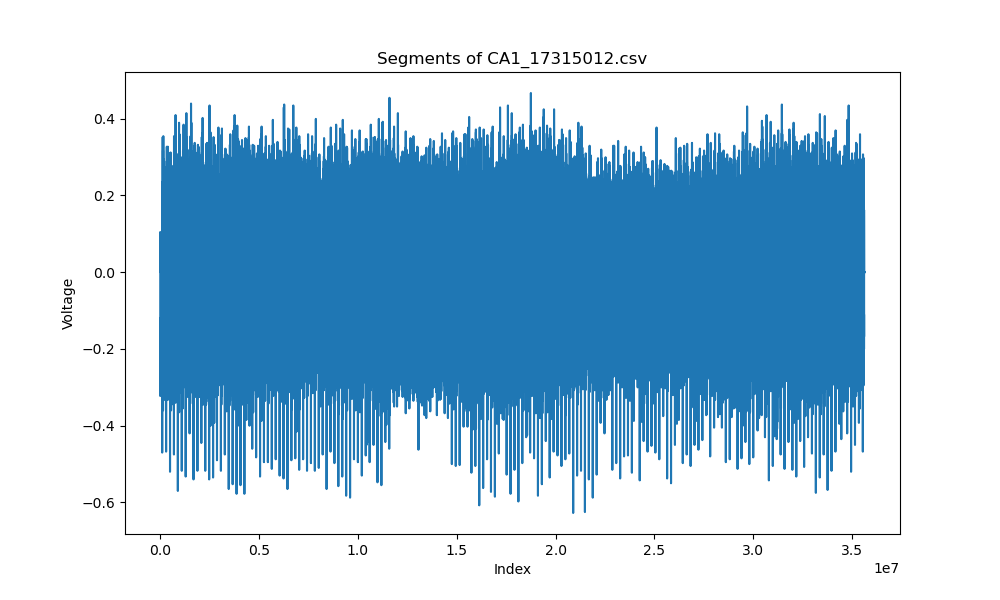

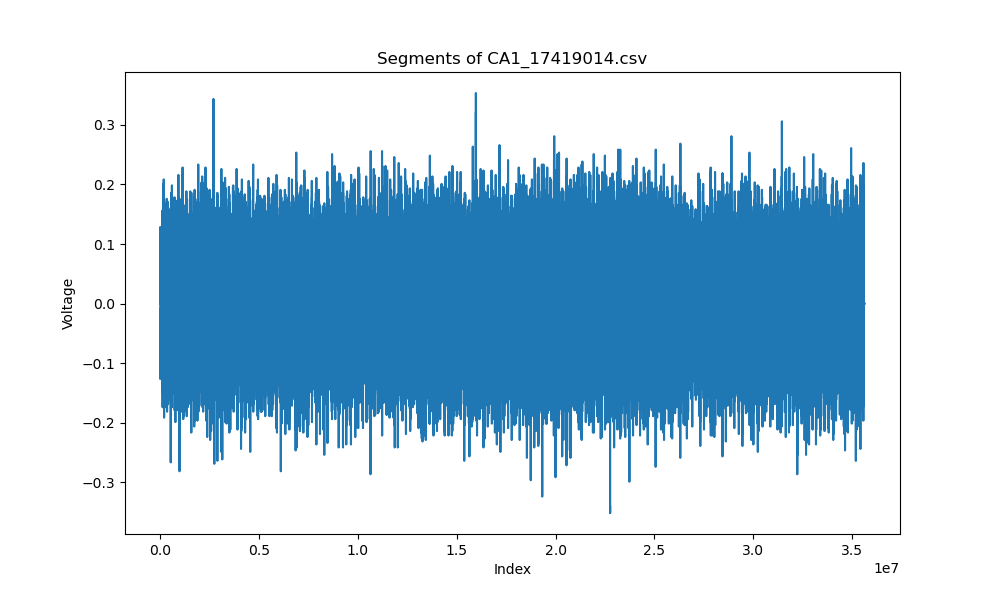

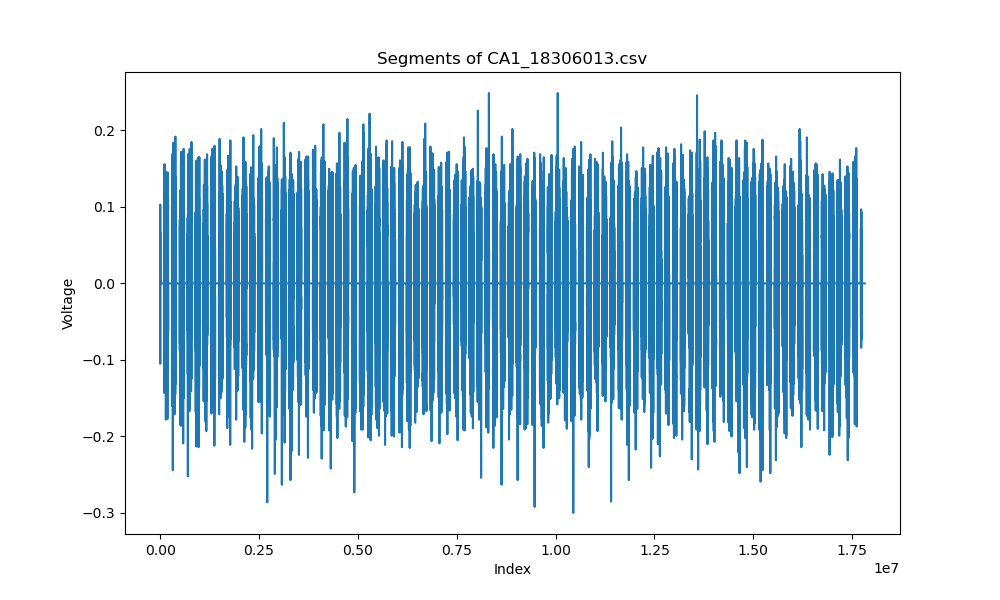

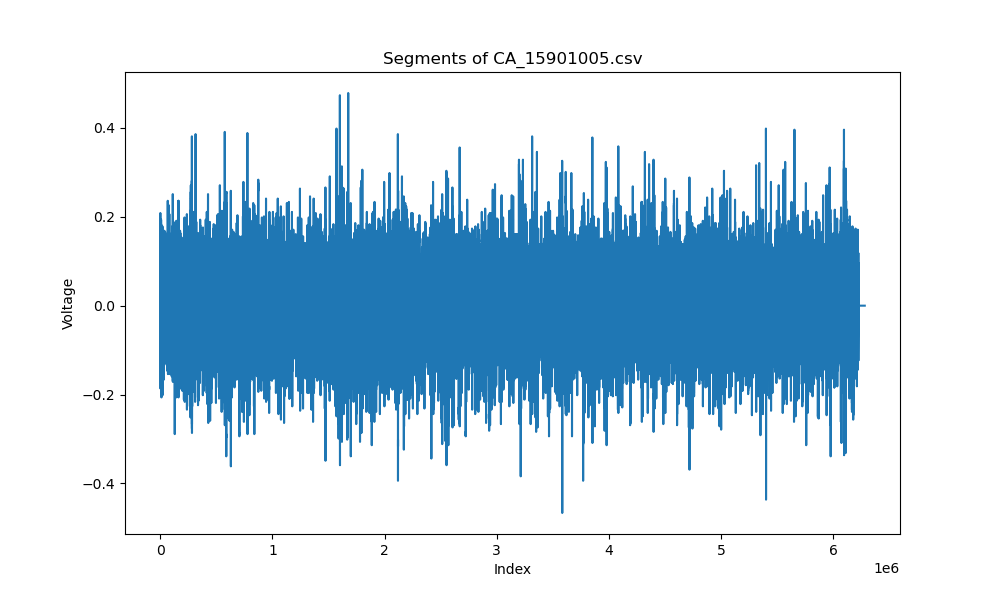

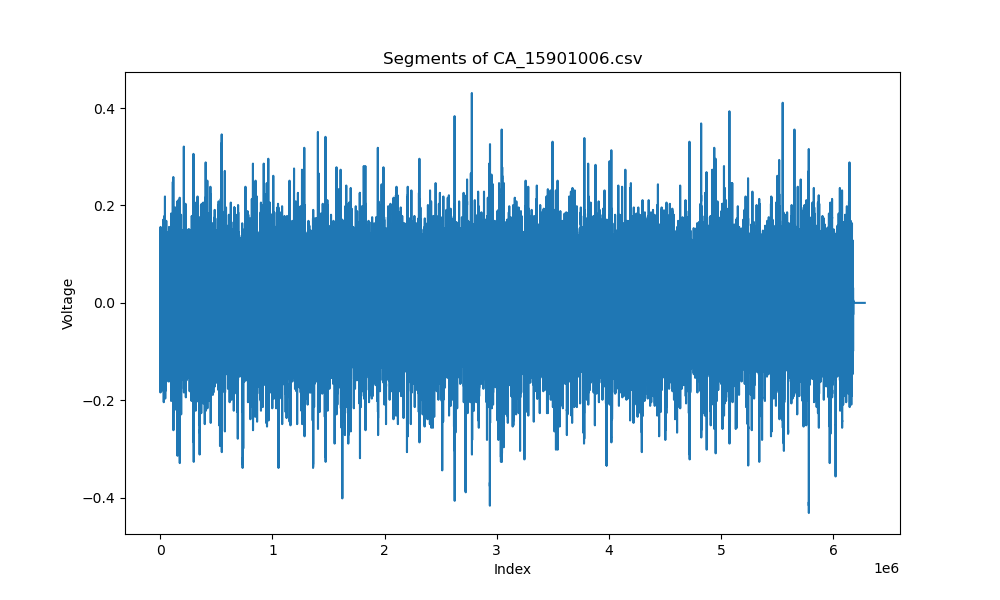

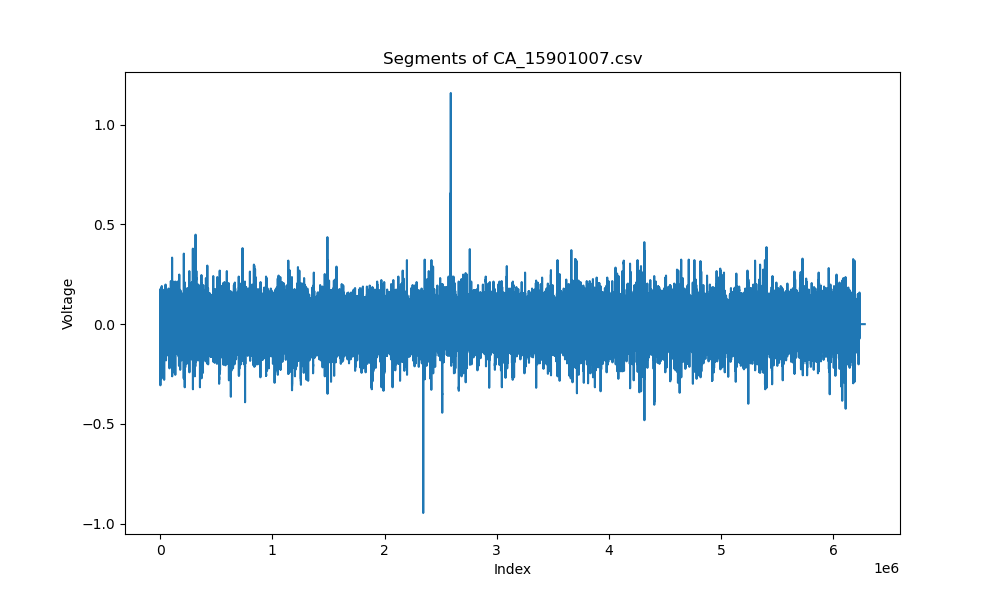

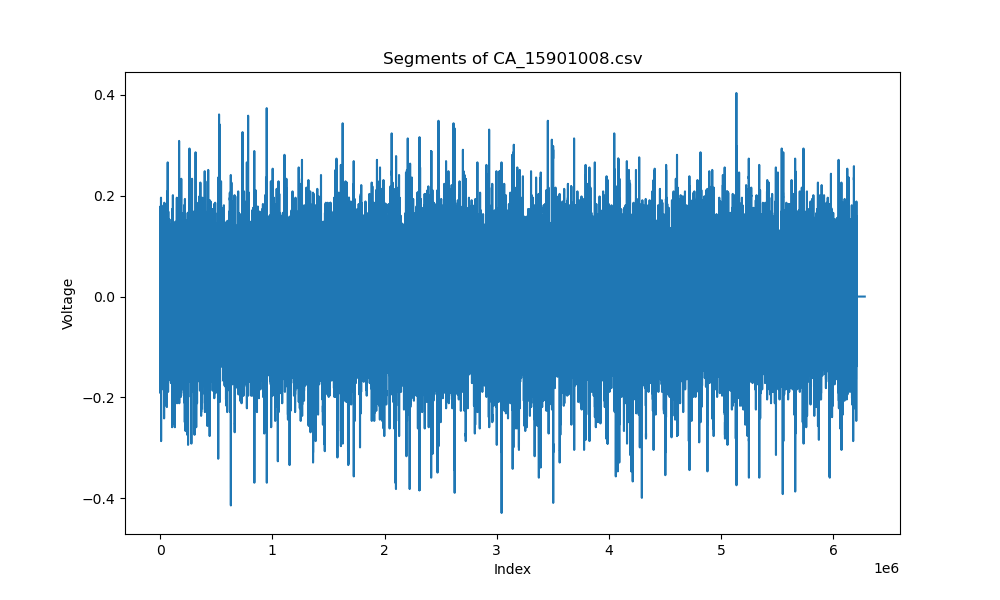

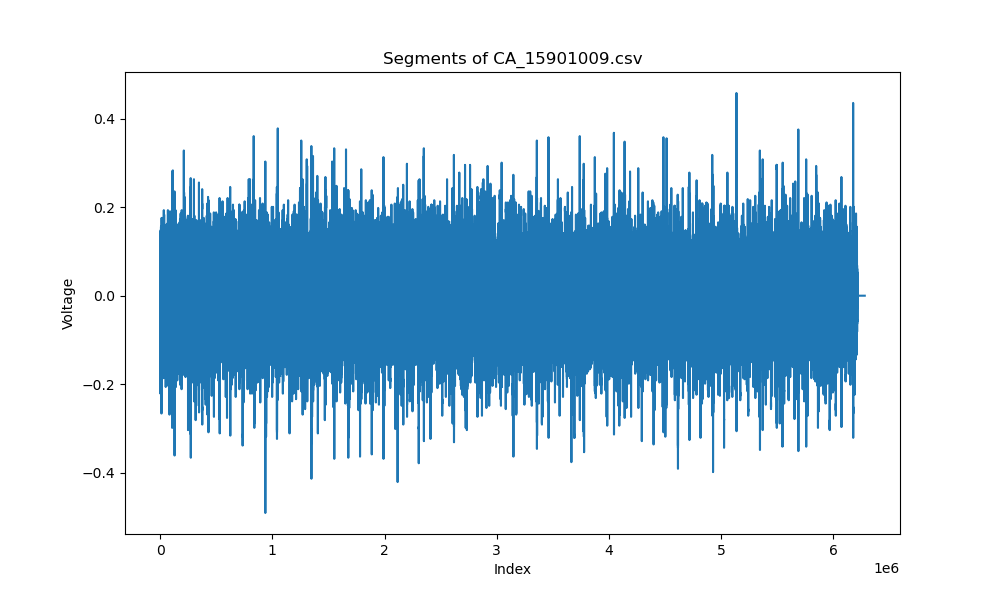

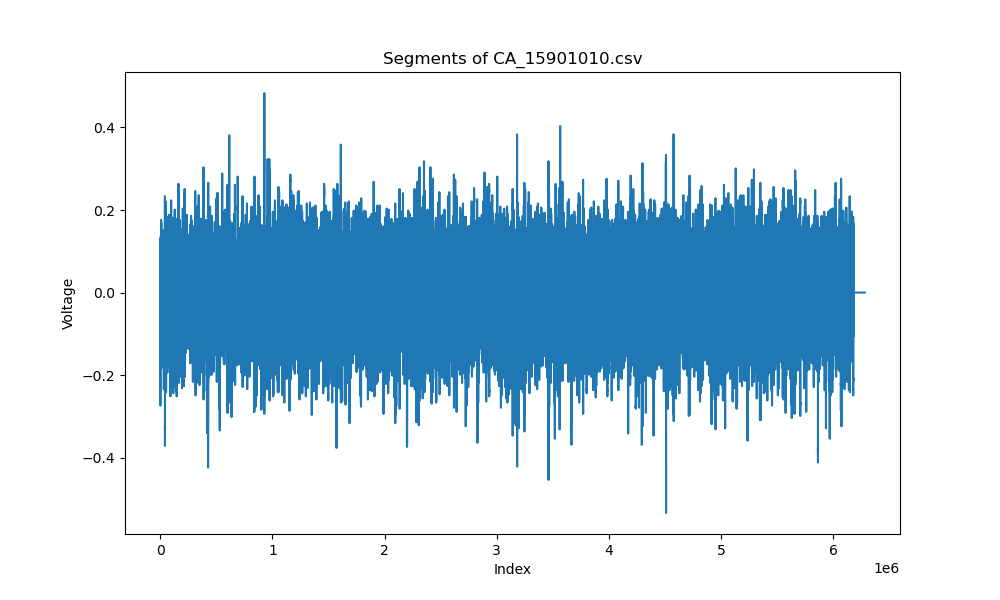

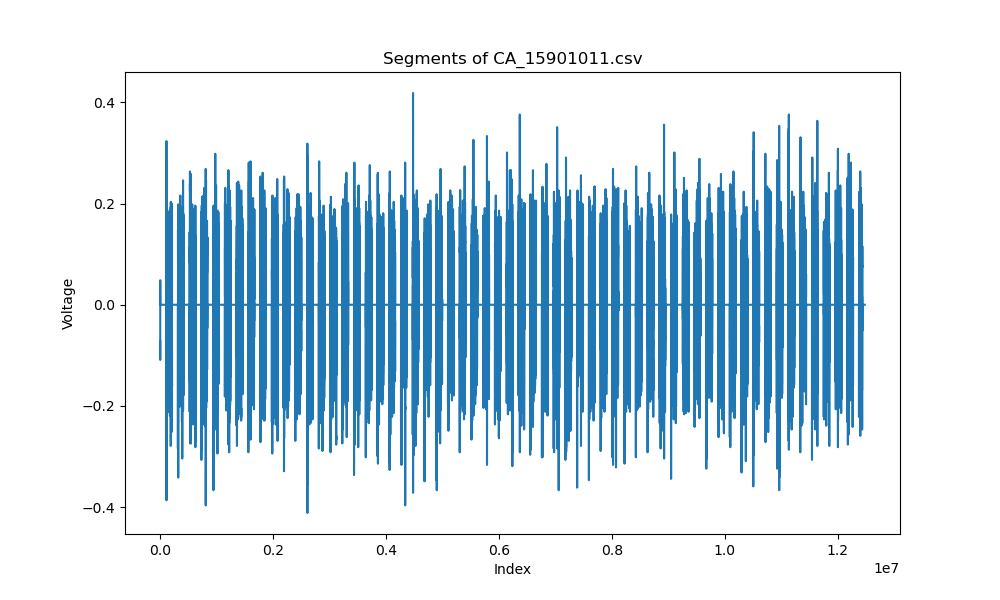

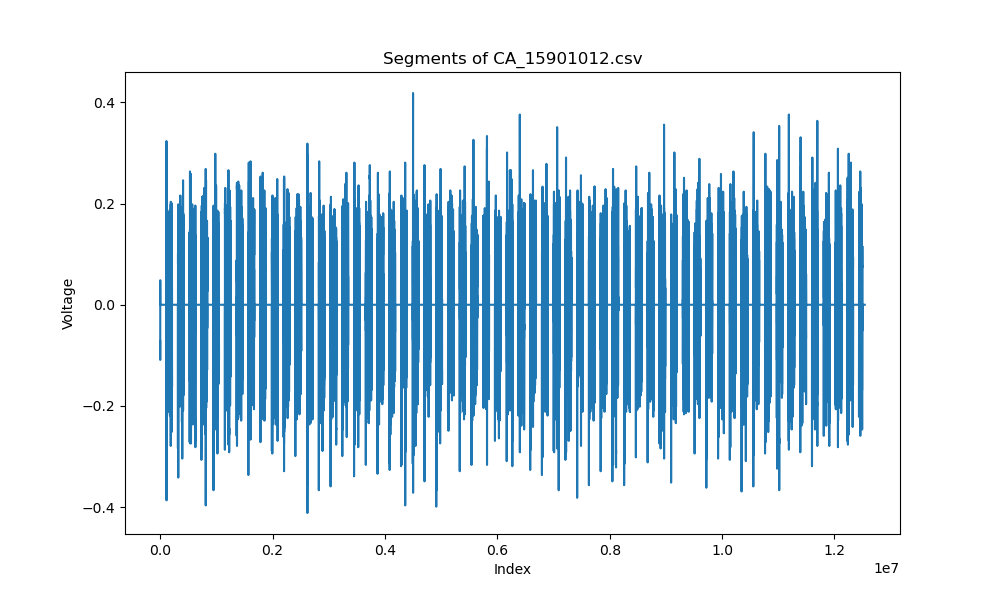

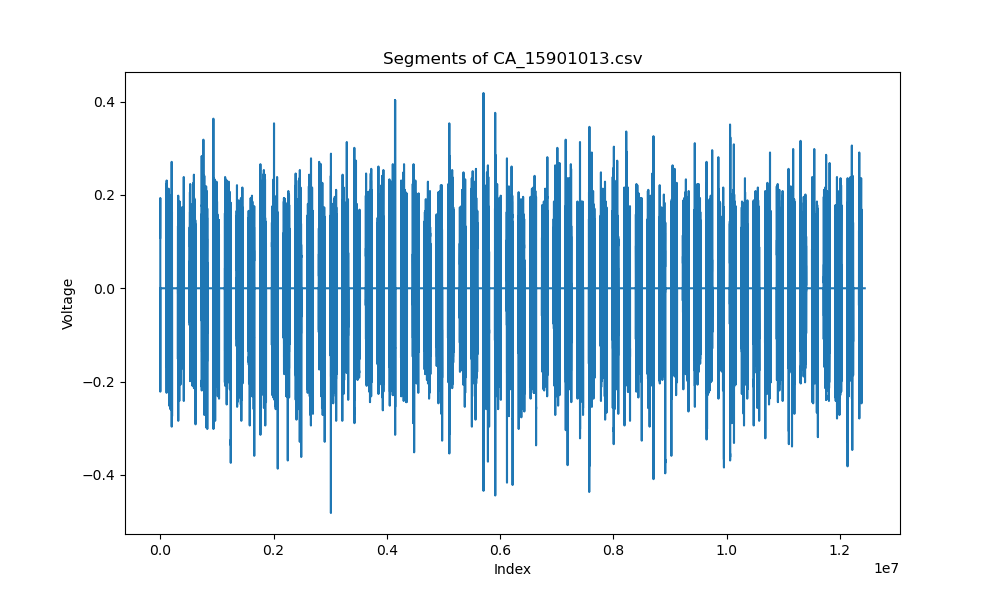

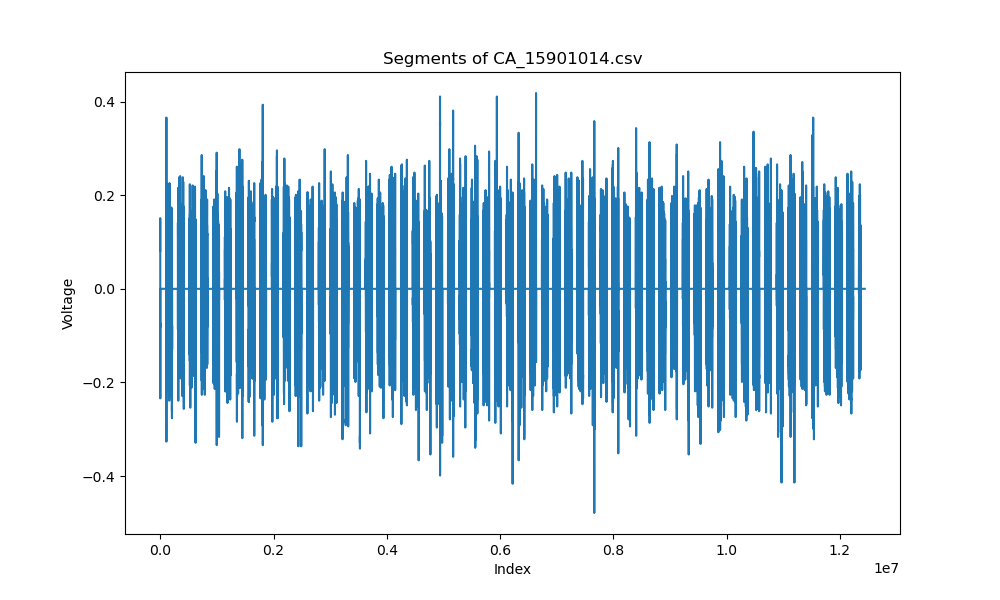

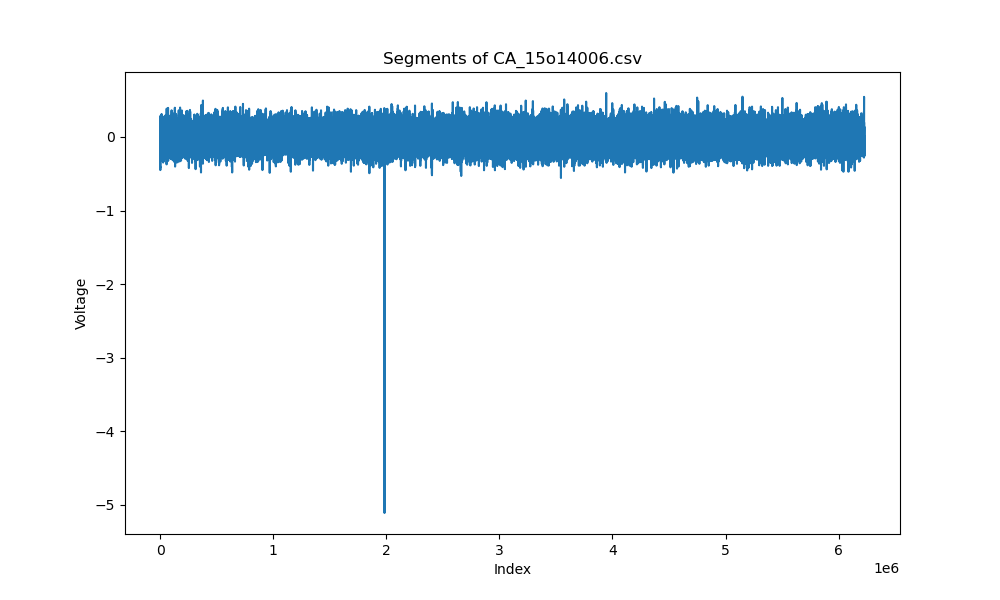

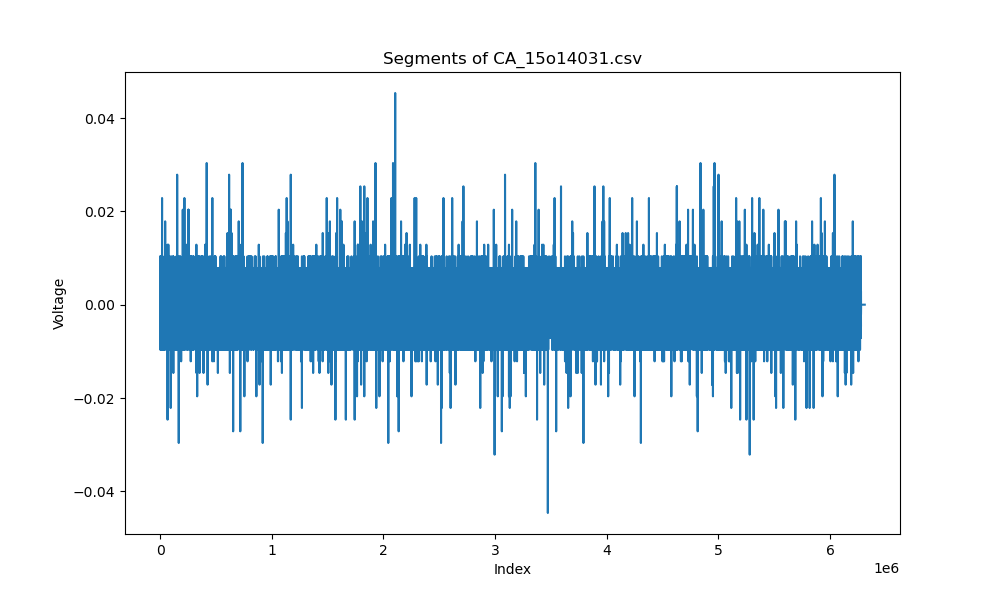

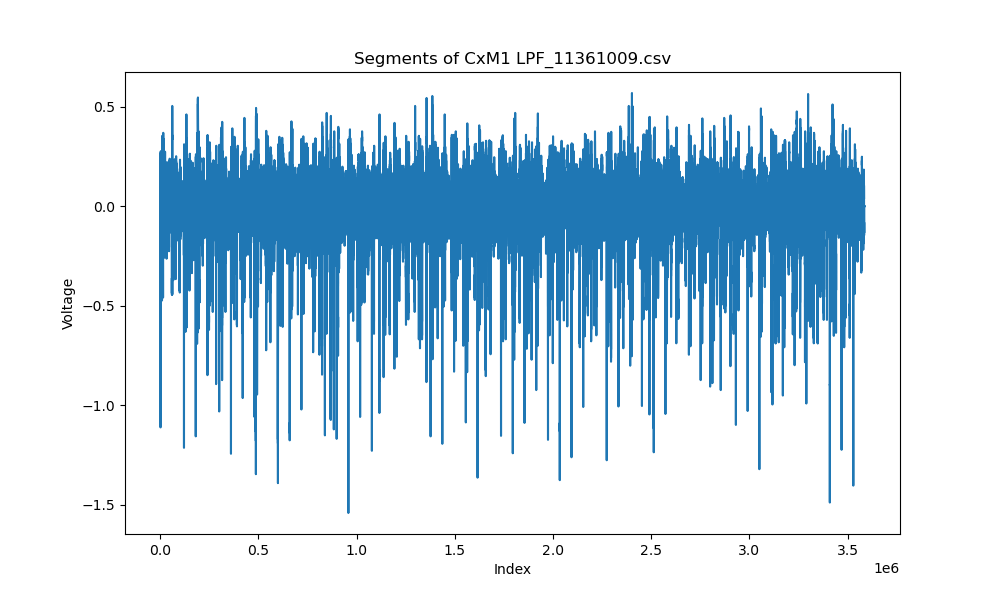

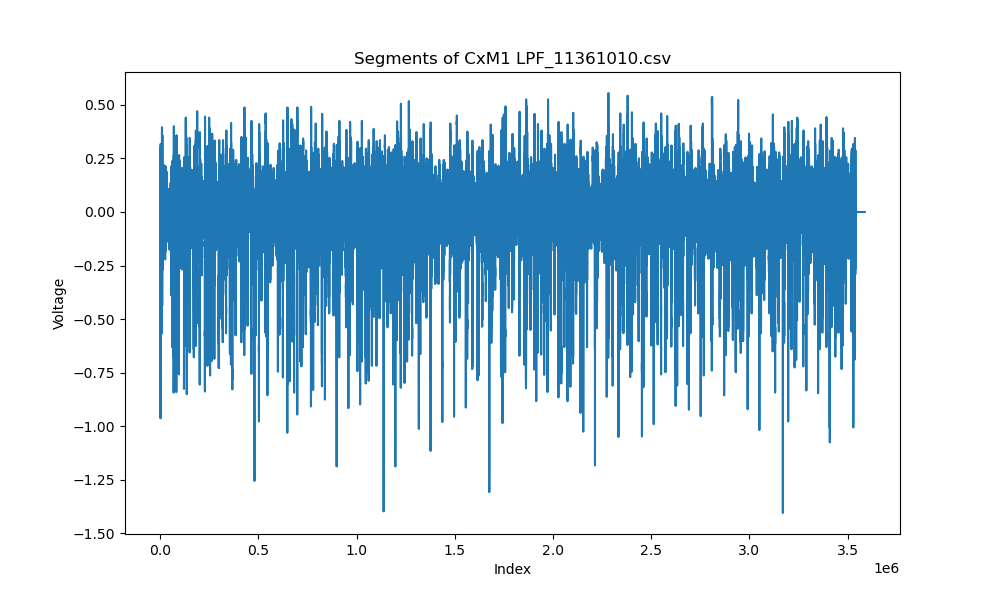

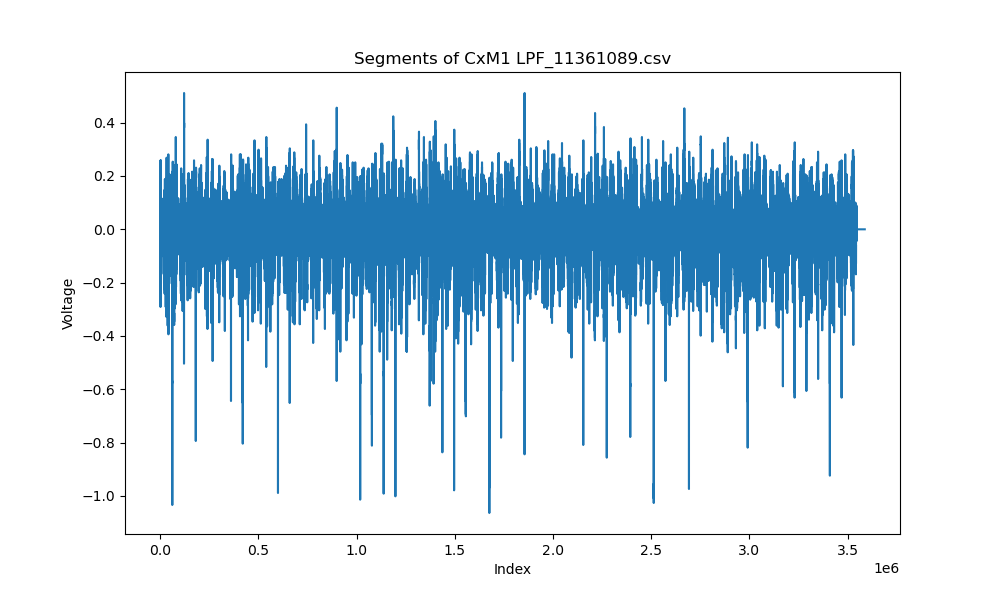

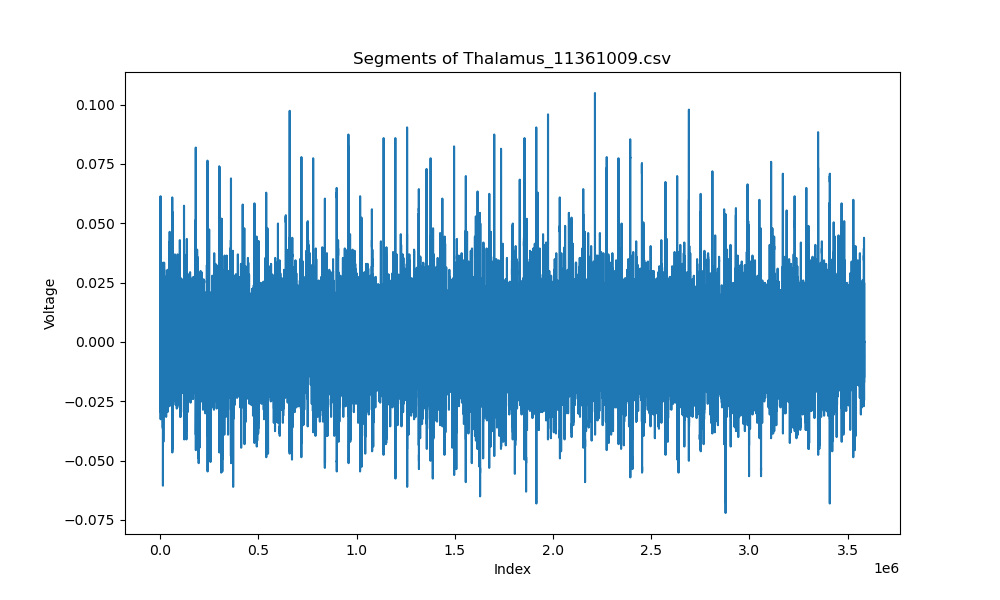

C:\Users\franc\AppData\Local\Temp\ipykernel_21004\3428104831.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


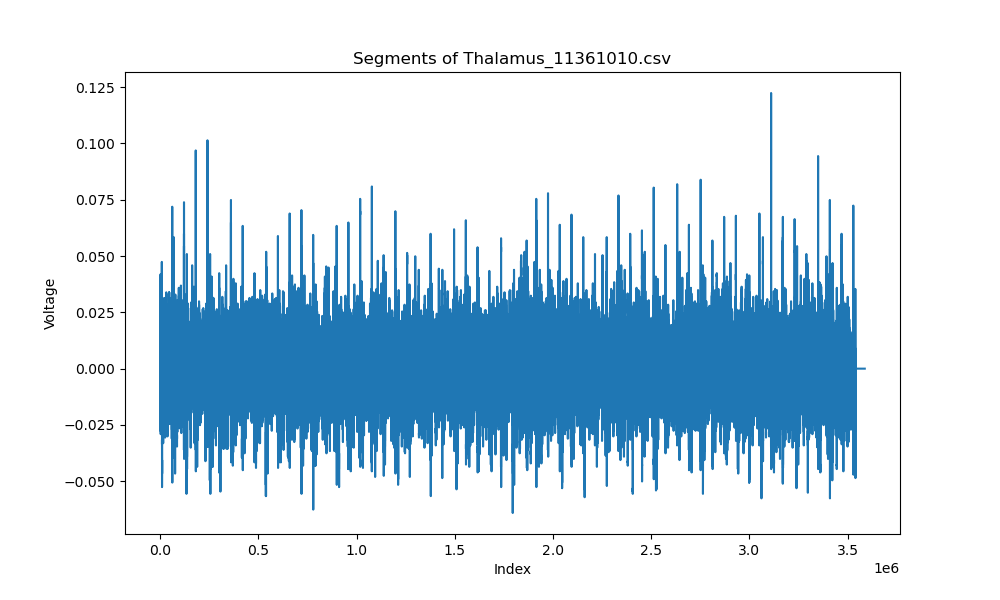

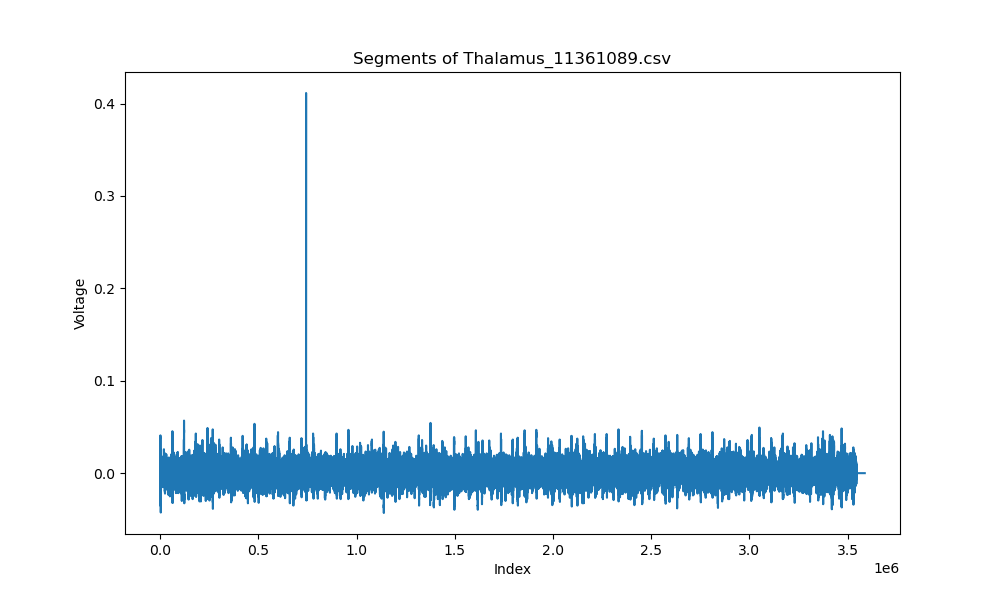

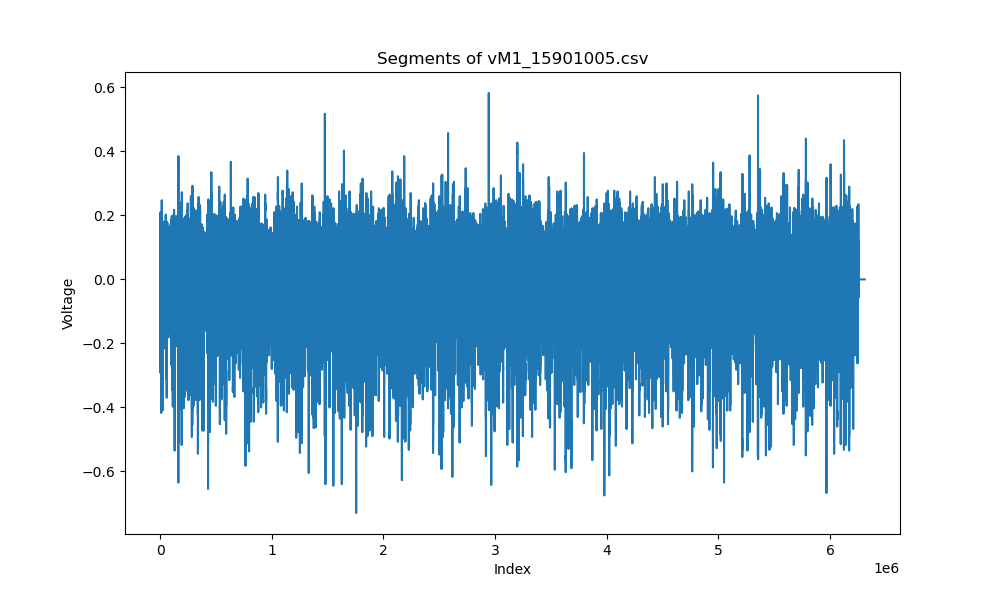

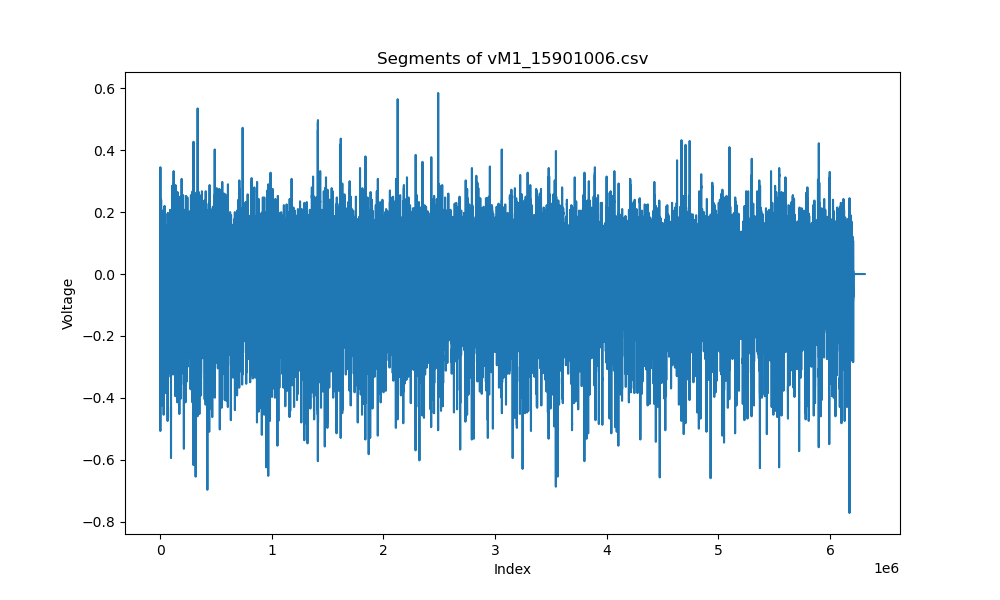

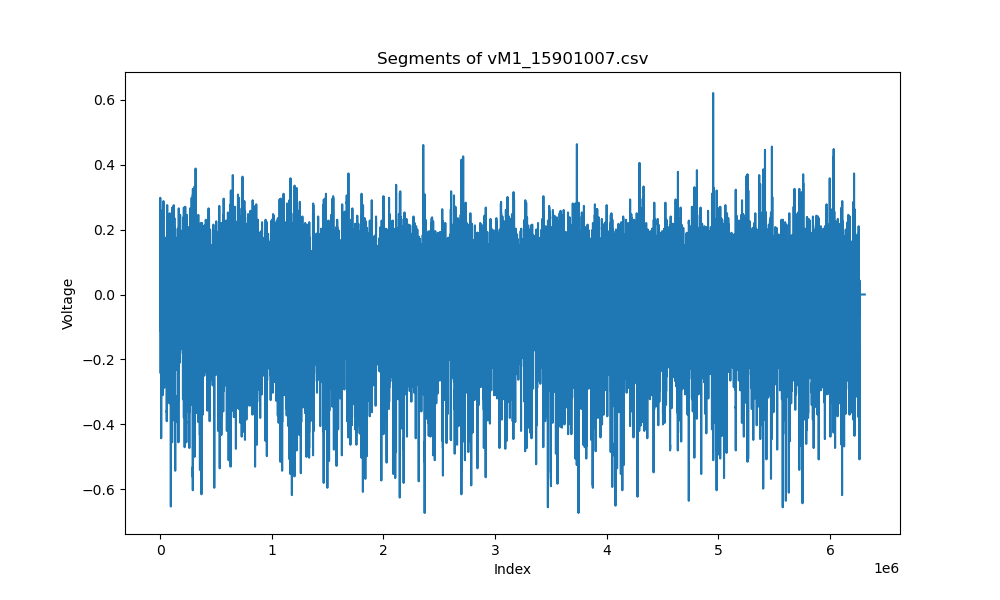

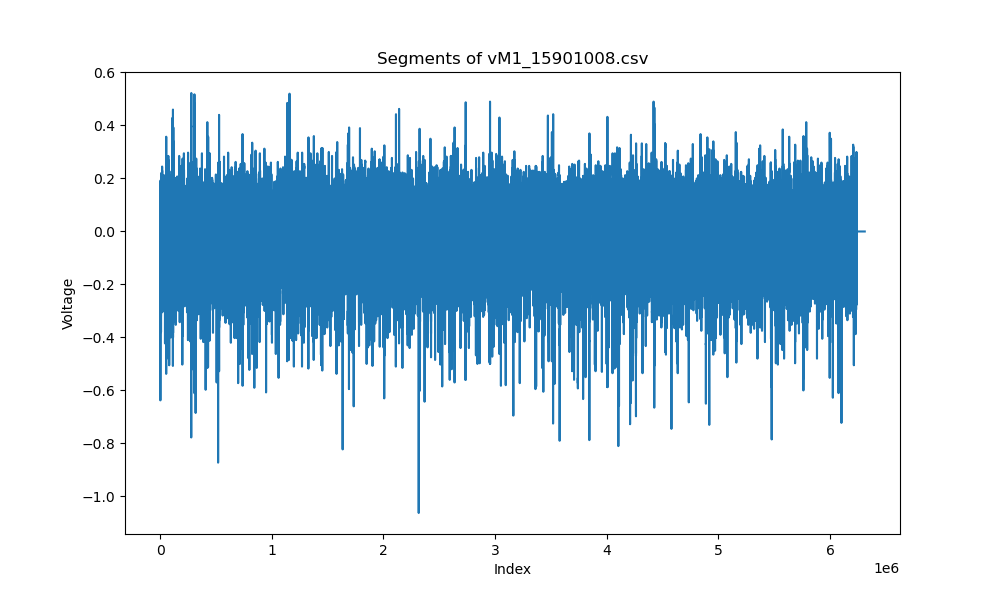

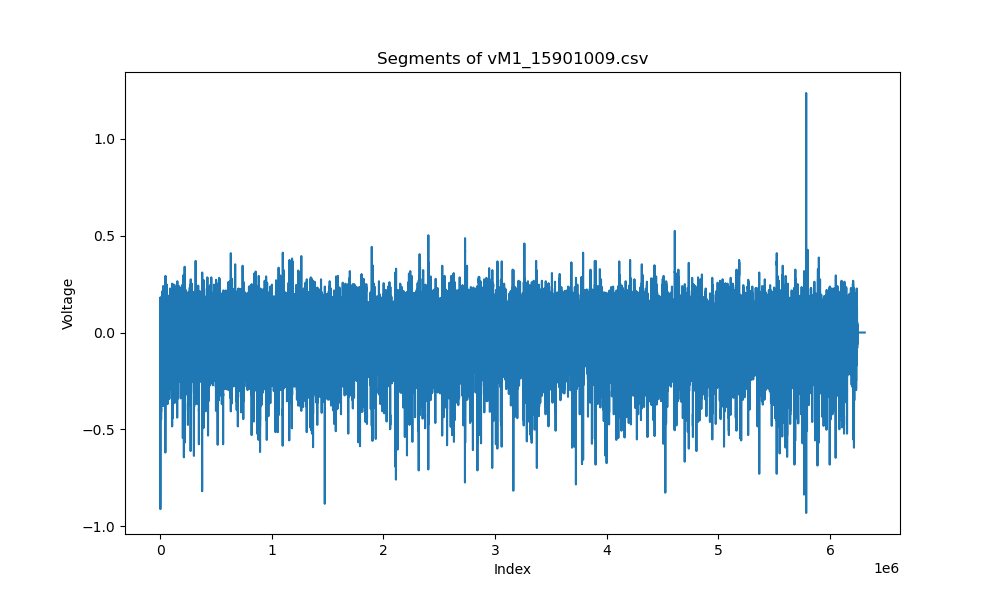

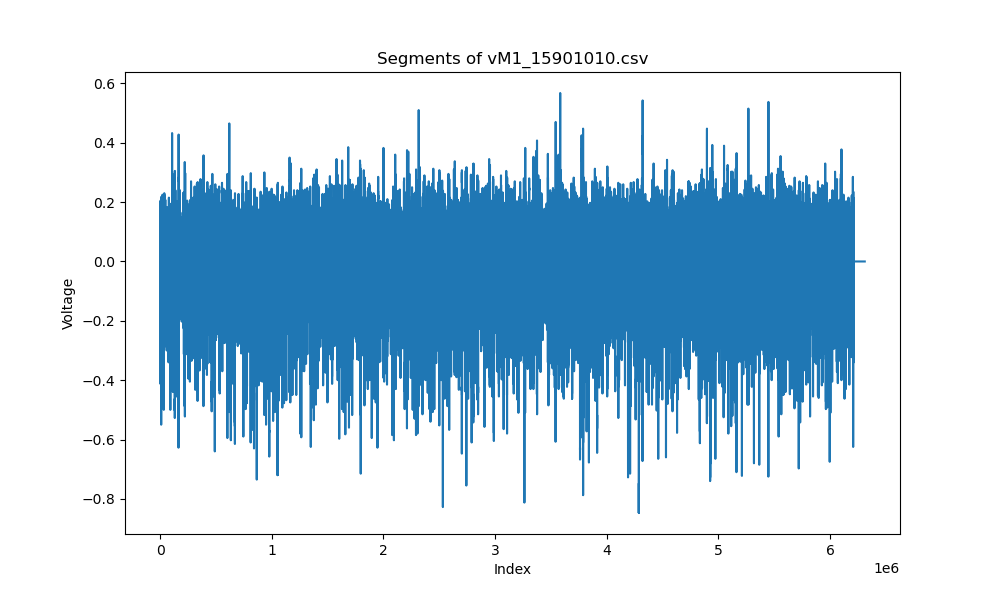

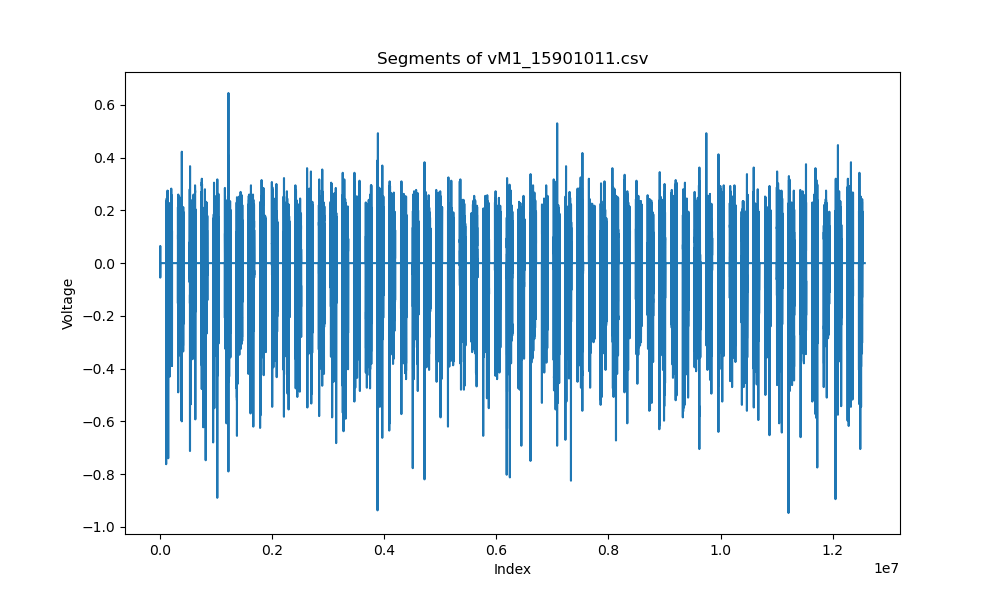

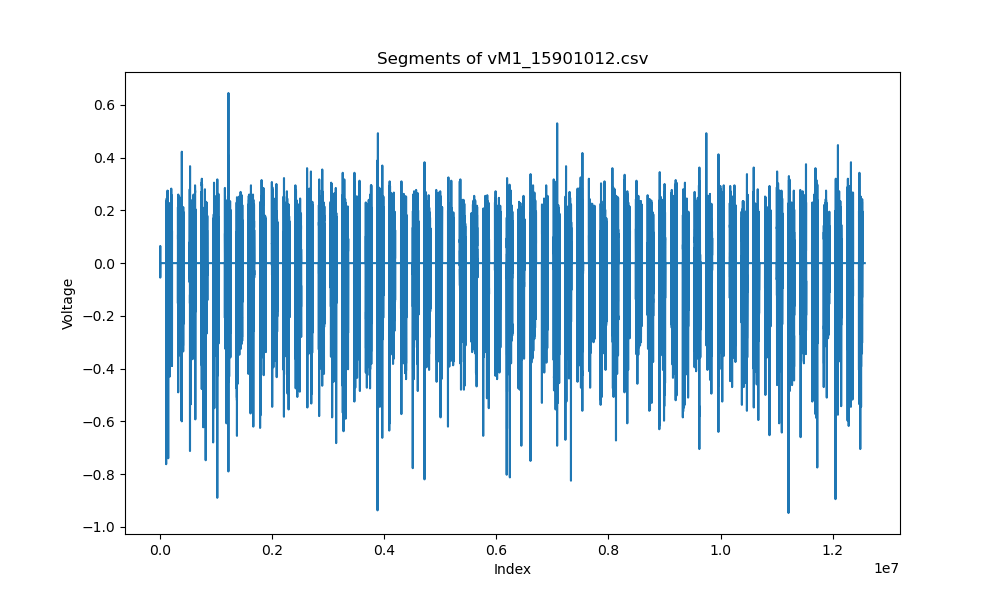

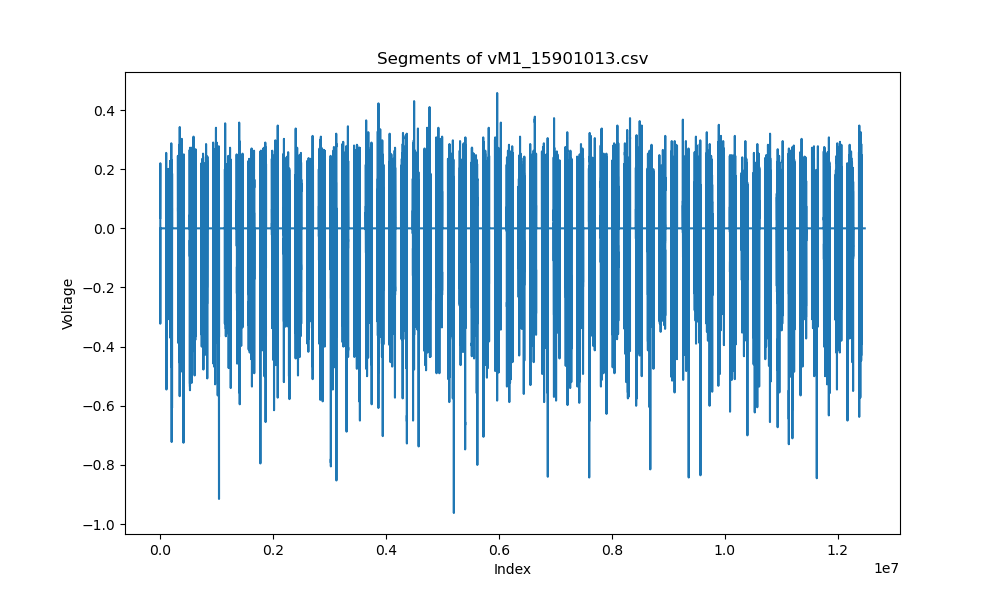

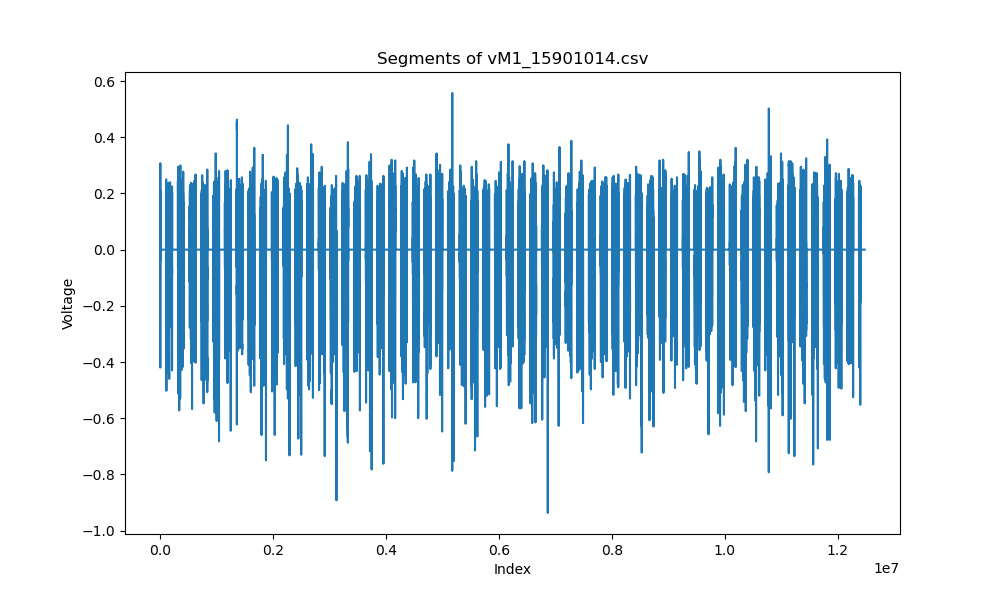

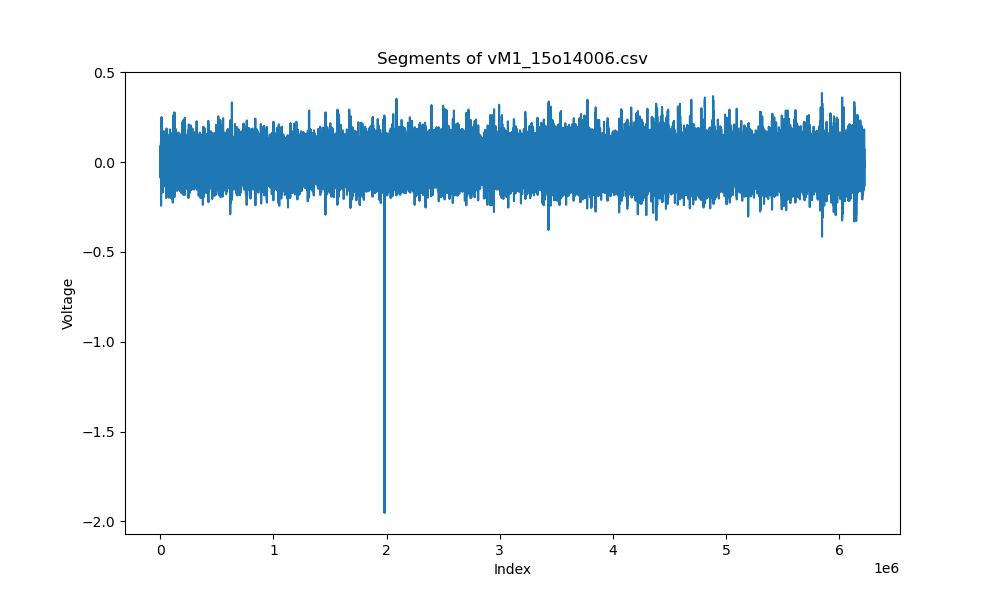

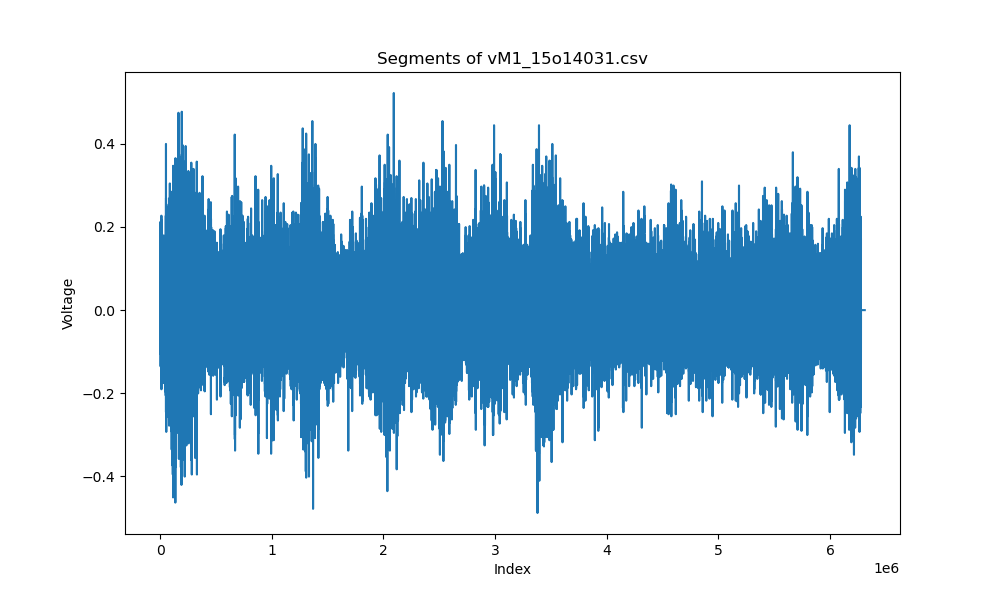

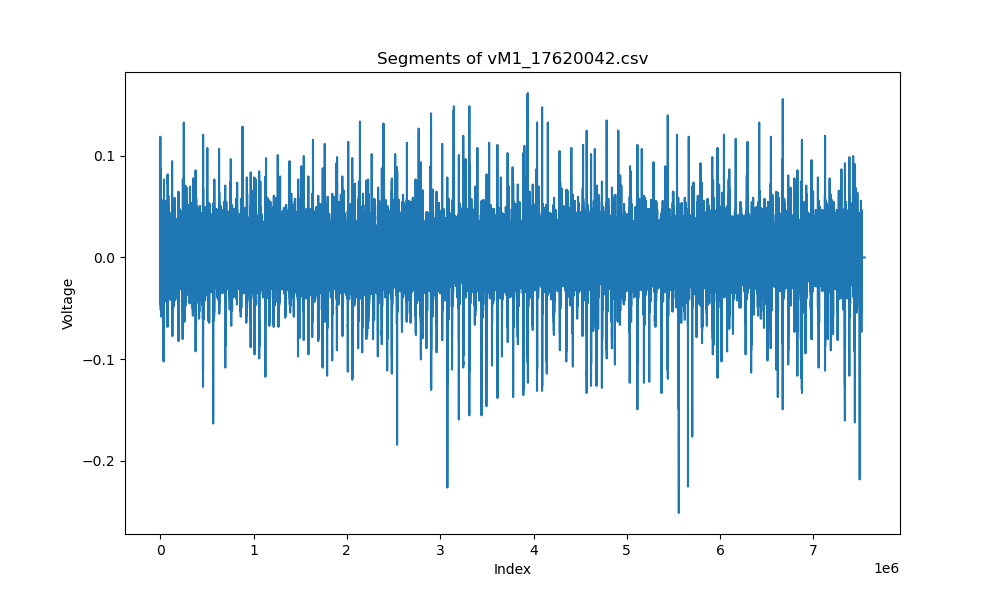

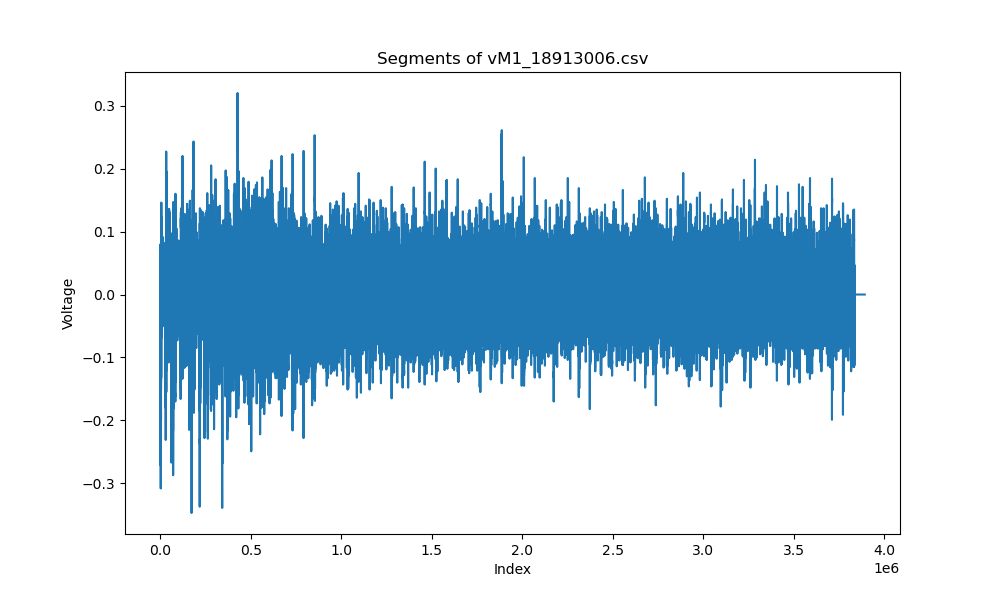

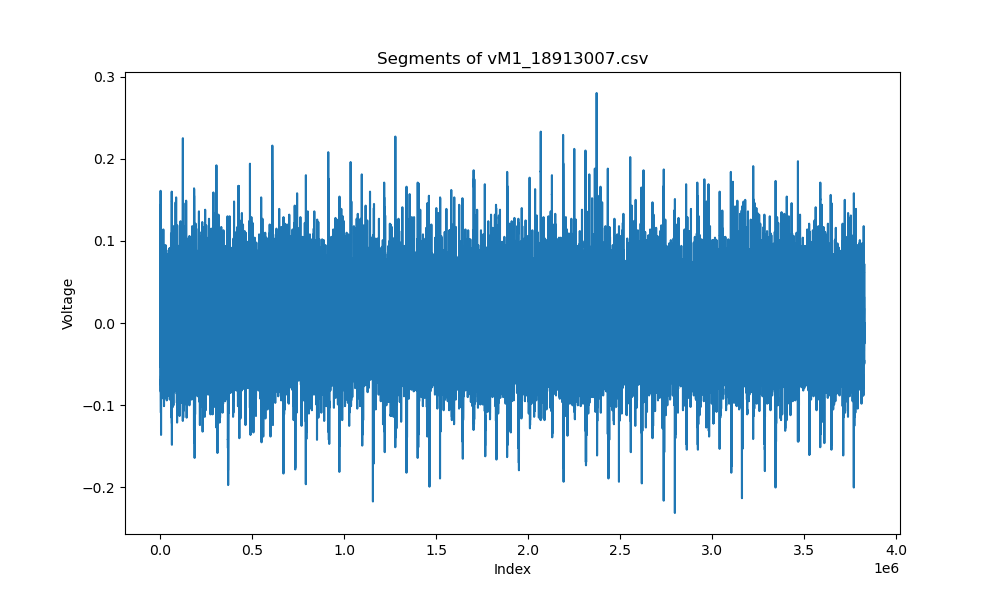

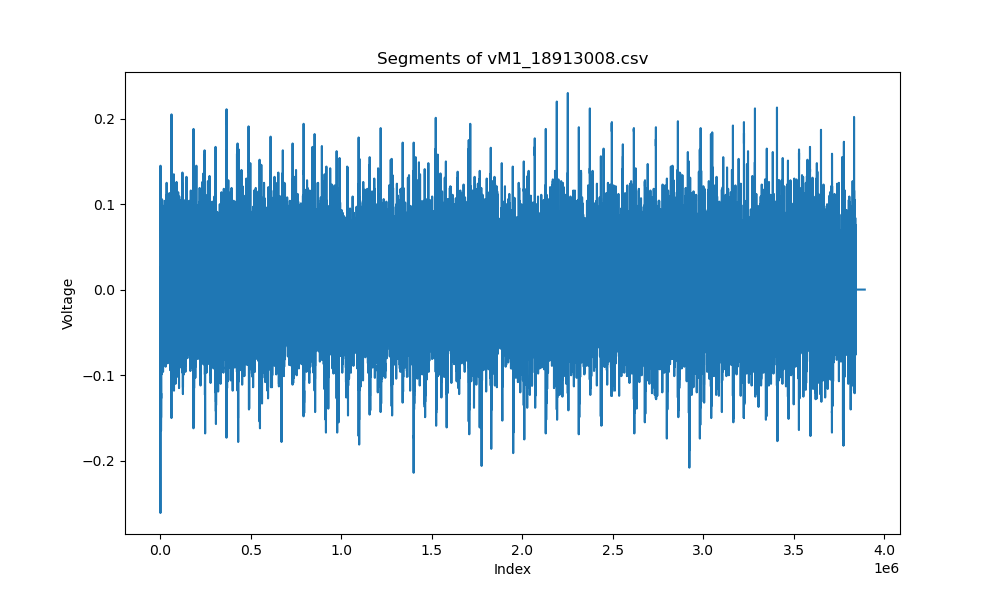

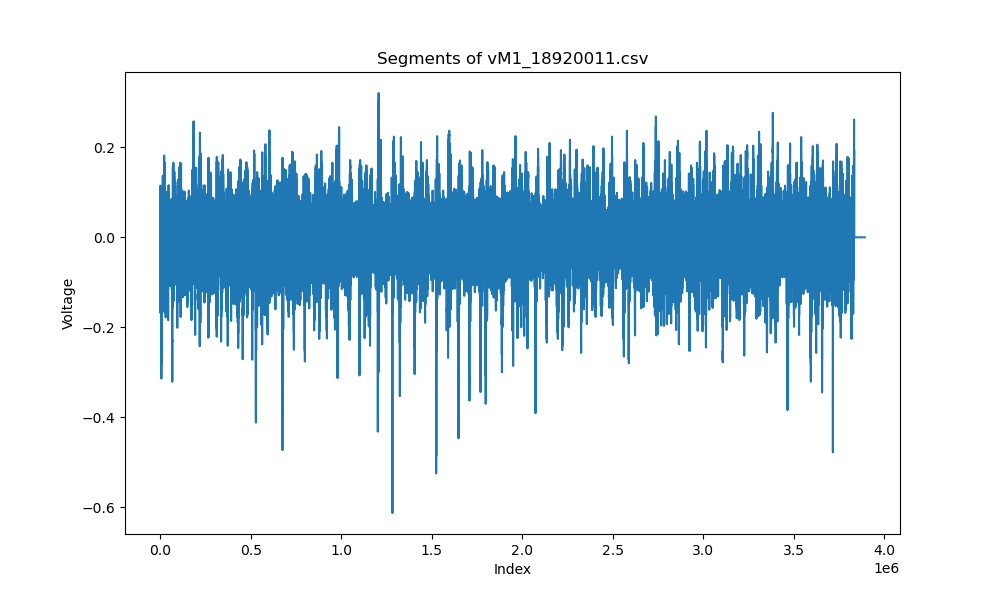

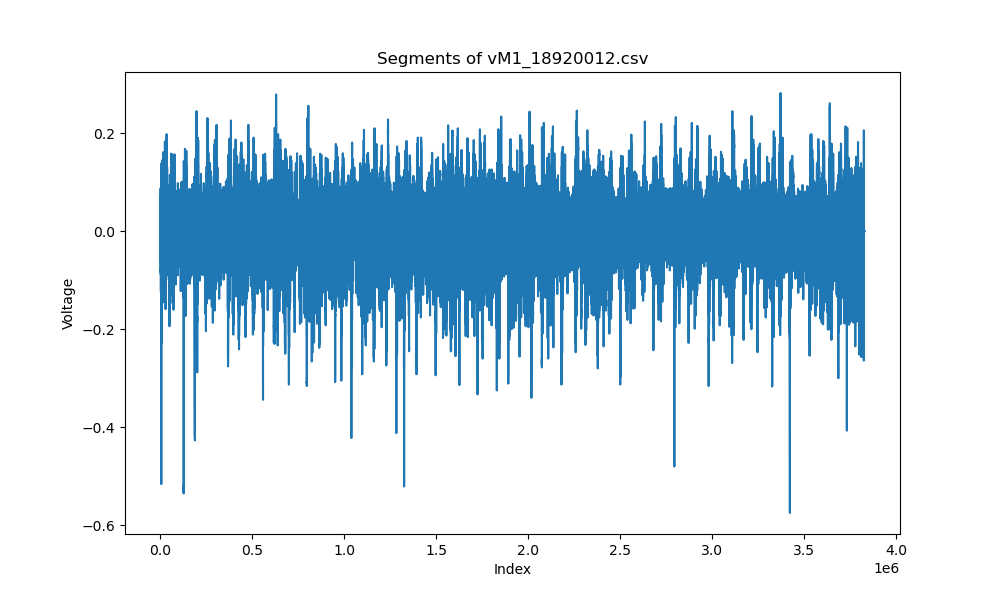

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_signal_segments(df, folder_path):
    """
    Función para graficar los segmentos de cada matriz especificada en el DataFrame.
    
    Parámetros:
        df (DataFrame): DataFrame que contiene la información de los outliers, incluyendo los nombres de las señales.
        folder_path (str): Ruta del directorio que contiene los archivos CSV de las matrices.
    """
    # Eliminar duplicados para procesar cada archivo solo una vez
    unique_files = df['Signal Name'].drop_duplicates()

    for file in unique_files:
        file_path = os.path.join(folder_path, file)
        if os.path.exists(file_path):
            # Cargar la matriz desde el archivo CSV
            data = pd.read_csv(file_path)
            
            # Preparar la figura para graficar
            plt.figure(figsize=(10, 6))
            plt.title(f'Segments of {file}')
            plt.xlabel('Index')
            plt.ylabel('Voltage')

            # Concatenar todas las columnas en una sola para graficar secuencialmente
            concatenated_data = pd.concat([data[col] for col in data.columns], ignore_index=True)
            
            # Graficar los datos
            plt.plot(concatenated_data)
            plt.show()
        else:
            print(f"File not found: {file_path}")

# Ejemplo de cómo usar la función
df = pd.DataFrame({
    'Signal Name': ['matrix1.csv', 'matrix2.csv'],
    'Segment Number': [1, 1],
    'Row Number': [10, 15],
    'Voltage Value': [0.5, -0.5]
})
folder_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix'
plot_signal_segments(df_outliers, folder_path)


### Modelado 

In [6]:
from sklearn.model_selection import train_test_split

def prepare_train_test_data(directory_path, test_size=0.2):
    """
    Prepara los datos de entrenamiento y prueba a partir de los archivos en un directorio.

    Parameters:
    - directory_path (str): Ruta del directorio que contiene los archivos CSV.
    - test_size (float): Proporción del conjunto de prueba.

    Returns:
    - tuple: Cuatro elementos (X_train, X_test, y_train, y_test).
    """
    X, y = [], []
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            label = filename.split('_')[0]  # Asumiendo que la etiqueta está al inicio del nombre del archivo
            file_path = os.path.join(directory_path, filename)
            data_matrix = load_data_matrix(file_path)
            X.append(data_matrix)
            y.append(label)
    
    X = np.array(X)
    y = np.array(y)

    return train_test_split(X, y, test_size=test_size, random_state=42)

In [6]:
directory_path = r'C:\Users\franc\Downloads\saved_matrix\saved_matrix_normalize'

In [10]:
X_train, X_test, y_train, y_test = prepare_train_test_data(directory_path, test_size=0.2)

C:\Users\franc\AppData\Local\Temp\ipykernel_5128\1163801982.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [17]:
# Asumiendo que X_train y X_test necesitan ser transformados
X_train_lstm = np.expand_dims(X_train, axis=-1)  # Agrega una nueva dimensión al final para las características
X_test_lstm = np.expand_dims(X_test, axis=-1)    # Igual para X_test

# Ahora, X_train y X_test deberían tener la forma (num_samples, num_timesteps, 1)

In [18]:
input_shape = X_train_lstm.shape[1:]

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, TimeDistributed
from tensorflow.keras.metrics import Recall, Precision, F1Score

def build_lstm_model(input_shape):
    """
    Construye y retorna un modelo LSTM.

    Parameters:
    - input_shape (tuple): Forma de los datos de entrada (timesteps, features).

    Returns:
    - tensorflow.keras.Model: El modelo LSTM compilado.
    """
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision(), F1Score()])
    return model

In [19]:
# Construir el modelo LSTM
model_lstm = build_lstm_model(input_shape)

# Entrenar el modelo
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [12]:
def build_gru_model(input_shape):
    """
    Construye y retorna un modelo GRU.

    Parameters:
    - input_shape (tuple): Forma de los datos de entrada (timesteps, features).

    Returns:
    - tensorflow.keras.Model: El modelo GRU compilado.
    """
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=input_shape),
        GRU(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision(), F1Score()])
    return model

def build_rnn_model(input_shape):
    """
    Construye y retorna un modelo RNN simple.

    Parameters:
    - input_shape (tuple): Forma de los datos de entrada (timesteps, features).

    Returns:
    - tensorflow.keras.Model: El modelo RNN compilado.
    """
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        SimpleRNN(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision(), F1Score()])
    return model